## Multi-class classification with logistic regression

In [28]:
%matplotlib inline
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import time
from IPython import display

In [2]:
IMAGE_SIZE = 20

#### Loading data from matlab file using scipy.io.loadmat()

In [3]:
train_data = io.loadmat("ex3data1.mat")
X = train_data['X']
y = train_data['y']

#### Change output label of "0" from "10" to "0" because python index start from 0 not 1 like MATLAB

In [4]:
y[y==10] = 0

Please note that the $reshape()$ function in NUMPY and MATLAB default behavior is different,
To make $reshape()$ in numpy behave the same we add flag order="F" when call reshape function in numpy

In [5]:
def display_data(data):
    m,n = data.shape
    row_width = int(np.sqrt(m))
    img_width = img_height = int(np.sqrt(n))
    img_show = np.empty((row_width*img_width, img_width*row_width))
    for i in range(row_width):
        for j in range(row_width):
            img_show[img_height*i:(img_height*i)+img_height, img_width*j:img_width*j + img_width] = \
            np.reshape(data[i*row_width + j, :], (img_height, img_width), order='F')
            
    plt.imshow(img_show)

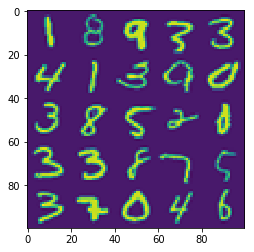

In [6]:
idx = np.random.randint(X.shape[0], size=25)
display_data(X[idx, :])

Compute logistic regression cost function and gradient

In [7]:
def sigmoid(value):
    return 1 / (1 + math.e ** (-value))

In [8]:
def lrCost(theta, X, y, _lambda=0):
#     print('theta', theta.shape, 'X', X.shape, 'y', y.shape)
    m,n = X.shape
    Z = np.dot(X, theta)
    H = sigmoid(Z)
    C = (1/m) * ( -np.dot(y.T, np.log(H)) - np.dot((1-y).T, np.log(1 - H) ))
    Regularization = (_lambda/(2*m)) * np.dot(theta[1:].T, theta[1:])
    
    return C + Regularization

Compute Gradient of Cost Function using batch gradient descent

In [131]:
def lrGradient(theta, X, y, alpha=1, _lambda=0):
    m,n = X.shape
    regularization = (_lambda/m) * theta[1:]
    z = np.dot(X, theta)
    print('X', X, 'theta', theta, 'z',z)
    grad_theta =  (alpha/m) * np.dot(X.T, (sigmoid(z) - np.reshape(y, (m, 1))))
    grad_theta[1:] = grad_theta[1:] + regularization
    return grad_theta

Training our 1 vs All logistic regression model with batch gradient descent

In [130]:
def oneVsAll(X, y, num_labels, alpha=1, _lambda=0, num_iteration=100):
    m,n = X.shape
    all_theta = np.zeros((n+1, num_labels))
    X = np.insert(X, 0, 1, axis=1)
    
    for i in range(num_labels):
        y_label = y.copy()
        # Convert y to binary vector for each labels
        # Example : if label = 5 then y vector value = 1 if the value at that index = 5 otherwise 0
        idx0 = y_label!=i
        idx1 = y_label==i
        y_label[idx1] = 1
        y_label[idx0] = 0
        
        # Use gradient descent to minimize the Cost of each output label
        for j in range(num_iteration):
            print('Label ' + str(i) + ',Iteration :' + str(j) + ', Cost : ' + str(lrCost(all_theta[:,[i]], X, y_label, _lambda)), end='\r')
            all_theta[:,[i]] = all_theta[:,[i]] - lrGradient(all_theta[:,[i]], X, y_label, alpha, _lambda)
            
        print('\n')
    return all_theta
        

Compute Gradient of Cost Function using stochastic gradient descent

In [128]:
def lrStochasticGradient(theta, X, y, alpha=1, _lambda=0, batch_size=1):
    # Random shuffle our training set
    X, y = shuffle(X, y)
    m,n = X.shape
    for i in range(0, m, batch_size):
        theta = theta - lrGradient(theta, X[i:i+batch_size,:], y[i:i+batch_size])
        
    return theta

Training our 1 vs All logistic regression model with stochastic gradient descent

In [126]:
def oneVsAll_Stochastic(X, y, num_labels, alpha=1, _lambda=0, stochastic_loop=1, batch_size=1):
    m,n = X.shape
    all_theta = np.zeros((n+1, num_labels))
    X = np.insert(X, 0, 1, axis=1)
    
    for i in range(num_labels):
        y_label = y.copy()
        # Convert y to binary vector for each labels
        # Example : if label = 5 then y vector value = 1 if the value at that index = 5 otherwise 0
        idx0 = y_label!=i
        idx1 = y_label==i
        y_label[idx1] = 1
        y_label[idx0] = 0
        
        # Using stochastic gradient descent to minimize the cost of each output label
        for _ in range(stochastic_loop):
            all_theta[:,[i]] = all_theta[:,[i]] - lrStochasticGradient(all_theta[:,[i]], X, y_label, alpha, _lambda)
        print('Label ' + str(i) + ', Cost : ' + str(lrCost(all_theta[:,[i]], X, y_label, _lambda)))
        
    return all_theta

In [127]:
weights = oneVsAll_Stochastic(X, y, 10, alpha=1, _lambda=0, stochastic_loop=1)

(1, 401) (1, 1)
z [[ 0.]]
z [[-15.14085068]]
z [[-5.65786291]]
z [[-10.35109023]]
z [[-7.74428881]]
z [[-11.23994395]]
z [[-16.11855399]]
z [[-8.37419195]]
z [[-10.89355601]]
z [[-6.68205886]]
z [[-10.17755817]]
z [[-8.729702]]
z [[-11.64278854]]
z [[-16.77063341]]
z [[-9.27836213]]
z [[-8.14571972]]
z [[-10.56849701]]
z [[-6.48819397]]
z [[-10.53055953]]
z [[-7.45871423]]
z [[-25.66278175]]
z [[-16.47630858]]
z [[-14.19305683]]
z [[-15.90229177]]
z [[-15.24621153]]
z [[-16.34605167]]
z [[-4.05339217]]
z [[-10.40369513]]
z [[-9.26901129]]
z [[-17.43051648]]
z [[-10.98326038]]
z [[-7.8648692]]
z [[-19.60191405]]
z [[-7.57757544]]
z [[-17.06665129]]
z [[-9.37524213]]
z [[-17.14031221]]
z [[-12.01924669]]
z [[-5.38186068]]
z [[-9.9712676]]
z [[-5.33957782]]
z [[-7.93199527]]
z [[-19.13714122]]
z [[-9.91552993]]
z [[-12.68441935]]
z [[-6.69707542]]
z [[-10.27061349]]
z [[-17.48094274]]
z [[-21.62430531]]
z [[-5.33454941]]
z [[-9.72829526]]
z [[-14.88291863]]
z [[-14.01232714]]
z [[-9.34525

z [[-9.02391255]]
z [[-15.81323973]]
z [[-31.24548665]]
z [[-43.3039522]]
z [[-38.48015193]]
z [[-25.2251799]]
z [[-25.85771296]]
z [[-32.94549635]]
z [[-19.1906716]]
z [[ 22.03069772]]
z [[-36.55936403]]
z [[-39.56392812]]
z [[-47.26911801]]
z [[-58.5694589]]
z [[-39.33476277]]
z [[-31.11772699]]
z [[-63.41478237]]
z [[-58.63335319]]
z [[-39.87294761]]
z [[-32.15762429]]
z [[-6.42931715]]
z [[-41.89537919]]
z [[ 16.03355834]]
z [[-28.19616568]]
z [[-23.12536285]]
z [[-24.50194681]]
z [[-55.65358909]]
z [[ 19.97409471]]
z [[-6.4965796]]
z [[-45.75355852]]
z [[-48.84579203]]
z [[-18.88600417]]
z [[-48.72814884]]
z [[ 2.69741325]]
z [[-47.30806616]]
z [[-48.60473079]]
z [[-72.59857391]]
z [[-64.78706159]]
z [[-23.15225094]]
z [[-43.0682442]]
z [[-91.40964653]]
z [[-36.40244836]]
z [[ 14.85831354]]
z [[-35.29843866]]
z [[-85.94696438]]
z [[-2.92713568]]
z [[-43.1173821]]
z [[-49.90741994]]
z [[-34.83121862]]
z [[-57.39025518]]
z [[-58.09258545]]
z [[-22.46164042]]
z [[-27.66018571]]
z [[-

z [[-34.53459569]]
z [[-100.49909999]]
z [[-30.48312367]]
z [[-37.49331511]]
z [[-63.54461985]]
z [[-72.72941682]]
z [[-66.40076876]]
z [[-116.60034594]]
z [[-63.22622193]]
z [[-64.31262445]]
z [[-73.06164958]]
z [[-69.98871168]]
z [[-117.46340451]]
z [[-53.06138208]]
z [[-47.90718036]]
z [[-45.86913256]]
z [[-44.02396115]]
z [[-109.34775065]]
z [[-49.56357933]]
z [[-73.86672555]]
z [[-53.03777703]]
z [[ 6.18614243]]
z [[ 52.59111906]]
z [[-38.17030338]]
z [[-76.55508916]]
z [[-47.50614804]]
z [[-59.15885171]]
z [[-75.92880923]]
z [[-78.77249621]]
z [[-54.28359252]]
z [[-45.26223595]]
z [[-17.44891589]]
z [[ 40.63023864]]
z [[-88.22451726]]
z [[-53.65455314]]
z [[-52.54451865]]
z [[-87.52384674]]
z [[ 8.32100151]]
z [[ 4.27877649]]
z [[-82.54004178]]
z [[-95.24348973]]
z [[-7.20840003]]
z [[-79.14631024]]
z [[ 37.88273104]]
z [[-96.7327699]]
z [[-3.46292992]]
z [[-42.41443206]]
z [[ 20.39853711]]
z [[-52.84027937]]
z [[-52.47801223]]
z [[-69.68060802]]
z [[-10.47915168]]
z [[-58.234533

z [[ 42.46959592]]
z [[-74.60712484]]
z [[-69.7452591]]
z [[-94.87629997]]
z [[-6.09043672]]
z [[-61.91473167]]
z [[-3.10394755]]
z [[-47.95857874]]
z [[-80.45066762]]
z [[-108.35957554]]
z [[ 47.58484321]]
z [[-64.4916141]]
z [[-96.99552216]]
z [[-35.05867295]]
z [[ 49.60635262]]
z [[-124.51321684]]
z [[-109.8765212]]
z [[-64.84637318]]
z [[-54.64580838]]
z [[-72.68498371]]
z [[-91.66200487]]
z [[-88.04784295]]
z [[-57.41625138]]
z [[-67.73925864]]
z [[-67.45593559]]
z [[-82.61252767]]
z [[-14.41951019]]
z [[-62.89193691]]
z [[-62.56985789]]
z [[-90.19497107]]
z [[-23.92992617]]
z [[-56.67635528]]
z [[-45.67173992]]
z [[-77.19467385]]
z [[-94.96355169]]
z [[-42.17852964]]
z [[-67.64792317]]
z [[ 43.72523733]]
z [[ 35.35026764]]
z [[-42.5939127]]
z [[-153.84156009]]
z [[ 19.81977767]]
z [[-86.88767]]
z [[-85.24649785]]
z [[-88.91036602]]
z [[-64.73666572]]
z [[-108.65253912]]
z [[-55.57915689]]
z [[-48.35491934]]
z [[-80.98377355]]
z [[-78.46623148]]
z [[-89.34786721]]
z [[-105.2326951

z [[-27.38164278]]
z [[-84.40126538]]
z [[-97.2826491]]
z [[-65.19246686]]
z [[-37.09047402]]
z [[-111.60718929]]
z [[-17.95466752]]
z [[-92.59373126]]
z [[-87.18255008]]
z [[ 41.67097751]]
z [[-125.79022274]]
z [[-130.62870644]]
z [[-7.92462467]]
z [[-105.58262523]]
z [[-49.52582123]]
z [[-86.29821251]]
z [[-45.87474945]]
z [[-50.73210925]]
z [[-115.4269193]]
z [[-50.98593447]]
z [[ 18.42398768]]
z [[-117.37371488]]
z [[-7.27892284]]
z [[-36.30372147]]
z [[-57.44175261]]
z [[-53.08607641]]
z [[-101.94805497]]
z [[-68.44602764]]
z [[-105.61991168]]
z [[-103.88856478]]
z [[-93.52745849]]
z [[-52.55696564]]
z [[-140.53625195]]
z [[-28.41260451]]
z [[-12.9987792]]
z [[-83.05811217]]
z [[-72.06137337]]
z [[-22.89103011]]
z [[-65.30643091]]
z [[-69.29275504]]
z [[ 48.33015192]]
z [[ 100.68619778]]
z [[-67.66367574]]
z [[-49.06809895]]
z [[-55.83213422]]
z [[-60.3763583]]
z [[-130.48621574]]
z [[-70.17813891]]
z [[-31.6978782]]
z [[-26.11995112]]
z [[ 83.38201746]]
z [[-59.5859487]]
z [[-98.

z [[-111.31906538]]
z [[-110.4494676]]
z [[-134.88212137]]
z [[-130.30031101]]
z [[-87.12457096]]
z [[-92.01242458]]
z [[-159.60332336]]
z [[-8.02775042]]
z [[-120.32337807]]
z [[ 29.79140002]]
z [[-59.28097232]]
z [[-96.36990843]]
z [[-96.45036969]]
z [[-63.84536193]]
z [[-66.59759443]]
z [[-24.16445619]]
z [[-71.17027238]]
z [[-106.05070252]]
z [[-76.35722328]]
z [[-6.28828752]]
z [[-144.77512569]]
z [[-33.0378532]]
z [[-93.59707043]]
z [[-103.31816367]]
z [[-49.08227383]]
z [[-137.09219535]]
z [[-104.65306467]]
z [[-71.21603884]]
z [[-51.15032093]]
z [[-42.00246473]]
z [[-104.78884636]]
z [[-103.1840008]]
z [[-92.87052812]]
z [[-87.70434791]]
z [[-114.58553672]]
z [[-109.89049473]]
z [[-13.21051011]]
z [[-99.68614541]]
z [[-88.00100447]]
z [[-95.09839524]]
z [[-108.78017414]]
z [[-87.86601947]]
z [[-91.66630423]]
z [[-102.31793876]]
z [[-81.43212646]]
z [[-103.17205419]]
z [[-96.03918733]]
z [[-72.14216402]]
z [[-50.9994983]]
z [[-101.39483957]]
z [[-145.58691711]]
z [[-77.10989564]

z [[ 42.07636757]]
z [[-69.74071891]]
z [[-67.99750087]]
z [[-79.92276475]]
z [[-47.31802689]]
z [[-113.46534029]]
z [[-74.56885501]]
z [[-17.72114897]]
z [[-88.68823493]]
z [[ 68.46111838]]
z [[-34.07238634]]
z [[-82.13009264]]
z [[-68.0223609]]
z [[-56.8141933]]
z [[-56.79263899]]
z [[ 75.03862708]]
z [[-66.01251282]]
z [[-56.30952161]]
z [[ 46.82968617]]
z [[-89.99303958]]
z [[-52.21728374]]
z [[-46.52845491]]
z [[-75.20952093]]
z [[-40.22112656]]
z [[ 57.12230913]]
z [[-62.67831357]]
z [[-31.89655802]]
z [[-4.7339863]]
z [[-83.15104033]]
z [[-99.78061512]]
z [[-26.40576929]]
z [[ 3.72411616]]
z [[-47.26950226]]
z [[-106.16993788]]
z [[-75.27911328]]
z [[-49.03542483]]
z [[-75.21123962]]
z [[-95.01462629]]
z [[-49.61327746]]
z [[ 62.90283148]]
z [[-8.9346006]]
z [[ 17.83661797]]
z [[-67.66915468]]
z [[-27.26561689]]
z [[-114.09259533]]
z [[-103.18498758]]
z [[-70.0777433]]
z [[ 71.7414282]]
z [[-69.746433]]
z [[-77.91922845]]
z [[-75.46283641]]
z [[-62.60025074]]
z [[ 55.60079014]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


 [[-9.63797332]]
z [[ 77.91949299]]
z [[-78.60689955]]
z [[-127.73815171]]
z [[-70.29923303]]
z [[-115.75314121]]
z [[ 3.02317608]]
z [[ 27.44121215]]
z [[-45.1624438]]
z [[-44.80522101]]
z [[-112.53021142]]
z [[-120.22984085]]
z [[-30.88462014]]
z [[-24.58092266]]
z [[-148.62685945]]
z [[-49.88895529]]
z [[ 20.90239733]]
z [[-107.29525317]]
z [[-115.59294075]]
z [[-111.75743528]]
z [[-50.52855379]]
z [[-111.87990956]]
z [[-87.27321574]]
z [[-18.94209936]]
z [[-108.81567418]]
z [[-103.03366065]]
z [[-65.1860658]]
z [[-76.76460099]]
z [[-107.71095541]]
z [[-67.80588238]]
z [[-38.11602328]]
z [[-72.41822838]]
z [[-77.28216696]]
z [[-99.69915334]]
z [[-102.01060463]]
z [[-56.79635641]]
z [[-112.39525318]]
z [[-68.20737854]]
z [[-27.14029534]]
z [[ 54.45583381]]
z [[-62.87673905]]
z [[-105.89140954]]
z [[-64.68179789]]
z [[-102.79977265]]
z [[-54.97276889]]
z [[ 32.98025369]]
z [[-45.78112736]]
z [[-120.83281791]]
z [[-97.67741494]]
z [[-85.18234091]]
z [[ 44.17599575]]
z [[-92.82316913]]


z [[-55.95602775]]
z [[-43.50284658]]
z [[-14.45549307]]
z [[-50.41880988]]
z [[-55.58917374]]
z [[-37.03217241]]
z [[-78.44372783]]
z [[-34.85288803]]
z [[-19.63263638]]
z [[-21.73707318]]
z [[-11.97682799]]
z [[-47.99188917]]
z [[-56.35458751]]
z [[-47.4597651]]
z [[ 7.29173284]]
z [[ 12.93471]]
z [[-36.19666993]]
z [[-32.31261191]]
z [[-63.83768261]]
z [[-45.49270673]]
z [[-45.96224991]]
z [[-32.93654607]]
z [[-44.82771879]]
z [[-60.09499697]]
z [[-13.24185036]]
z [[-30.16071048]]
z [[-27.41721172]]
z [[-28.6931906]]
z [[ 1.45000499]]
z [[-21.16680587]]
z [[-36.09359576]]
z [[-53.76854927]]
z [[-11.63679566]]
z [[-17.36519304]]
z [[-31.76196853]]
z [[-21.38604659]]
z [[-23.77423825]]
z [[ 20.99103483]]
z [[-57.37734814]]
z [[-39.71348522]]
z [[-49.0441527]]
z [[-32.09740411]]
z [[-34.68186084]]
z [[-42.15961256]]
z [[-51.29779713]]
z [[-8.15314101]]
z [[ 4.98312015]]
z [[-59.17045609]]
z [[-34.69863404]]
z [[-38.01262722]]
z [[-67.77349165]]
z [[-65.18568954]]
z [[-34.18835513]]
z [

z [[ 7.53159545]]
z [[-38.91320554]]
z [[-13.88739325]]
z [[-39.36913626]]
z [[-22.23318921]]
z [[-62.12888323]]
z [[-36.34075859]]
z [[-111.13838459]]
z [[-52.98025528]]
z [[-82.93629678]]
z [[-43.52481642]]
z [[-37.65275218]]
z [[-67.36356533]]
z [[-47.24693541]]
z [[-11.10648922]]
z [[-90.36346749]]
z [[-68.72346951]]
z [[-56.37858503]]
z [[-27.7111596]]
z [[-27.55914092]]
z [[-34.74373808]]
z [[-19.03723421]]
z [[-2.66793007]]
z [[-32.11478808]]
z [[-25.97077918]]
z [[-18.389261]]
z [[-114.93395575]]
z [[-28.03006064]]
z [[-88.04824905]]
z [[-18.61441511]]
z [[-64.64175179]]
z [[-73.65232697]]
z [[-15.12261423]]
z [[-51.22916554]]
z [[-78.66335158]]
z [[-85.8036576]]
z [[-75.94240001]]
z [[-70.96626038]]
z [[-50.37410192]]
z [[-50.26799054]]
z [[-11.57047534]]
z [[-48.84506965]]
z [[-10.76364974]]
z [[-62.37740958]]
z [[-9.58375959]]
z [[ 11.43783645]]
z [[-77.91079147]]
z [[-53.54022439]]
z [[-19.37230517]]
z [[-65.31830944]]
z [[-86.81489431]]
z [[-90.2155524]]
z [[-90.65105996]]

z [[-70.10592127]]
z [[-16.93091469]]
z [[ 22.18082925]]
z [[-49.55043784]]
z [[-45.17124264]]
z [[-14.87011844]]
z [[-100.83411853]]
z [[-61.1087978]]
z [[-46.75486752]]
z [[ 10.90209207]]
z [[-32.89988079]]
z [[-25.03461871]]
z [[-53.36213855]]
z [[-26.87799528]]
z [[-69.75921207]]
z [[ 7.75716967]]
z [[-13.05932778]]
z [[-101.23575923]]
z [[-37.0994782]]
z [[-60.41207973]]
z [[ 13.92883729]]
z [[-59.65873255]]
z [[ 24.64718595]]
z [[-46.94228017]]
z [[-60.70370152]]
z [[-58.7009559]]
z [[-33.95420779]]
z [[-27.6413027]]
z [[-41.1065457]]
z [[ 18.19971948]]
z [[-64.24144611]]
z [[-72.95929599]]
z [[-41.5035225]]
z [[-72.47262312]]
z [[-3.62940457]]
z [[-31.91524763]]
z [[-104.00391368]]
z [[-58.44033025]]
z [[-77.1463779]]
z [[-43.35889995]]
z [[-67.79704002]]
z [[-25.01969629]]
z [[-5.56878878]]
z [[-41.16761787]]
z [[-24.90262019]]
z [[-10.48969022]]
z [[-32.77371097]]
z [[-29.16073919]]
z [[-81.79541816]]
z [[-43.18237118]]
z [[-40.63229467]]
z [[-20.79314289]]
z [[ 6.80611693]]
z

z [[-95.55850046]]
z [[-35.05852412]]
z [[ 14.96494399]]
z [[-38.58326775]]
z [[ 13.07643388]]
z [[ 28.66712202]]
z [[-66.24578521]]
z [[-88.45860155]]
z [[-118.63019996]]
z [[-79.84303706]]
z [[-67.34556972]]
z [[-35.2298327]]
z [[-25.03664902]]
z [[-52.65525305]]
z [[-41.51224287]]
z [[-93.79183603]]
z [[-65.27953071]]
z [[ 18.32091908]]
z [[-70.9188883]]
z [[-69.98400471]]
z [[-48.44279635]]
z [[-93.08954976]]
z [[-114.71288394]]
z [[-38.08380989]]
z [[-40.96997291]]
z [[-90.18806447]]
z [[-83.79098935]]
z [[-76.66388254]]
z [[-113.13131817]]
z [[-80.20293982]]
z [[-131.42826766]]
z [[-60.15140787]]
z [[-71.55284819]]
z [[-66.38141103]]
z [[-102.95093578]]
z [[-25.74197192]]
z [[-59.57119167]]
z [[-131.5025798]]
z [[-80.23737305]]
z [[-48.64706896]]
z [[-60.18599912]]
z [[ 8.55501016]]
z [[-55.81644012]]
z [[-104.97127637]]
z [[-48.20166102]]
z [[-46.45945164]]
z [[-128.22246867]]
z [[ 16.69939136]]
z [[-41.53785001]]
z [[-50.71077533]]
z [[-90.73203452]]
z [[-64.72016502]]
z [[ 13.

z [[-116.54517035]]
z [[-76.30043832]]
z [[-74.7571664]]
z [[-140.39635828]]
z [[-71.80892099]]
z [[ 34.08087716]]
z [[-61.63249786]]
z [[-126.35698263]]
z [[-67.24505964]]
z [[-46.76885345]]
z [[-26.21461334]]
z [[-73.52660076]]
z [[-101.0625802]]
z [[-21.10097076]]
z [[-45.29939761]]
z [[-123.6274171]]
z [[ 15.99472449]]
z [[-52.44861625]]
z [[ 20.77040997]]
z [[-75.14858106]]
z [[-63.68512096]]
z [[-72.82135699]]
z [[-40.1648018]]
z [[-61.4263503]]
z [[-107.41221755]]
z [[-90.71637302]]
z [[-85.08543187]]
z [[-44.92888325]]
z [[-49.14059818]]
z [[-32.8084248]]
z [[-86.62825469]]
z [[-85.80922106]]
z [[-112.60360077]]
z [[-62.06850762]]
z [[-41.81747071]]
z [[ 17.34179231]]
z [[-39.78476642]]
z [[-83.94267702]]
z [[-68.9129818]]
z [[-35.82659625]]
z [[-56.80534418]]
z [[ 26.02631006]]
z [[ 27.59877033]]
z [[ 28.66615861]]
z [[-139.05568738]]
z [[-2.86063207]]
z [[-3.71082049]]
z [[-47.38415421]]
z [[ 45.58040589]]
z [[-96.79792549]]
z [[-37.24898794]]
z [[-53.90593999]]
z [[-63.19845

z [[-65.74808051]]
z [[-73.91764323]]
z [[-56.42020583]]
z [[-120.45848339]]
z [[-68.8264646]]
z [[ 21.76812992]]
z [[-66.79742713]]
z [[-45.10276363]]
z [[-76.21291112]]
z [[-104.89535608]]
z [[-56.33473194]]
z [[-37.24906622]]
z [[-115.06584801]]
z [[ 6.31706495]]
z [[-29.38631235]]
z [[-98.2996599]]
z [[-89.84215418]]
z [[-50.3405163]]
z [[-23.17444086]]
z [[-138.23341761]]
z [[-22.93127711]]
z [[-20.66799371]]
z [[-61.43752555]]
z [[-49.43115459]]
z [[-76.45965455]]
z [[-88.02868601]]
z [[-51.84062353]]
z [[-61.8895567]]
z [[-66.12243436]]
z [[-15.00638096]]
z [[-141.98063811]]
z [[-57.64084755]]
z [[-27.53967678]]
z [[-29.14236308]]
z [[-34.41848983]]
z [[ 29.45202488]]
z [[-48.49201767]]
z [[-68.33941985]]
z [[-101.20188492]]
z [[-114.94793231]]
z [[ 9.63123184]]
z [[-38.71129873]]
z [[-70.24882883]]
z [[-18.69584638]]
z [[-111.22080679]]
z [[-56.14736307]]
z [[-24.48961444]]
z [[-64.29391221]]
z [[-60.26969841]]
z [[-43.12453626]]
z [[-92.66014499]]
z [[-115.19309635]]
z [[-77.3

z [[-94.14268261]]
z [[-90.68729494]]
z [[ 0.94429985]]
z [[-52.47046182]]
z [[-64.72643061]]
z [[-98.04610017]]
z [[-68.78689646]]
z [[-37.40261415]]
z [[-60.6707086]]
z [[-110.90958707]]
z [[-48.99249996]]
z [[-82.72967253]]
z [[-85.17678297]]
z [[-49.04019317]]
z [[-39.15420438]]
z [[-68.54822962]]
z [[-63.07878471]]
z [[-54.86121316]]
z [[-49.49490138]]
z [[-108.82311247]]
z [[-36.78439002]]
z [[-112.13360182]]
z [[-32.42521103]]
z [[-60.94773666]]
z [[-74.46986529]]
z [[-63.99681081]]
z [[-42.00946397]]
z [[ 4.58559618]]
z [[-84.71192501]]
z [[-88.40336676]]
z [[-30.48505913]]
z [[-42.33136134]]
z [[-67.05141955]]
z [[-100.17394185]]
z [[-99.134222]]
z [[-49.59400941]]
z [[-92.62902832]]
z [[ 5.23195099]]
z [[-43.77840276]]
z [[-51.7853885]]
z [[-55.08313723]]
z [[-124.50597233]]
z [[-100.96119618]]
z [[-93.62886847]]
z [[-67.02166042]]
z [[-91.80595157]]
z [[-95.57698247]]
z [[-60.971751]]
z [[-111.04582034]]
z [[-46.93412059]]
z [[-91.07476251]]
z [[-27.86976034]]
z [[-59.512202

z [[-36.39206066]]
z [[-10.18953374]]
z [[-41.47219458]]
z [[-18.38623579]]
z [[-36.49247789]]
z [[-58.64526957]]
z [[-47.33555764]]
z [[-10.18830246]]
z [[-39.73254569]]
z [[-5.45535739]]
z [[-52.25437153]]
z [[-34.94995644]]
z [[ 11.43986553]]
z [[-44.30480641]]
z [[-55.26299188]]
z [[-9.54025662]]
z [[-58.76548939]]
z [[-28.23088847]]
z [[-24.01587017]]
z [[-46.86662179]]
z [[ 13.68253675]]
z [[ 7.77558546]]
z [[-57.68961337]]
z [[ 18.66860765]]
z [[-0.88396265]]
z [[-37.36826815]]
z [[-18.44701581]]
z [[-8.25078952]]
z [[ 40.55837868]]
z [[-21.02982766]]
z [[-50.78694611]]
z [[-30.85411609]]
z [[-16.87103045]]
z [[-0.75194296]]
z [[-49.35224228]]
z [[-25.82998719]]
z [[-70.16084415]]
z [[-61.7346751]]
z [[ 36.42585551]]
z [[-75.51830374]]
z [[-47.24697428]]
z [[-39.55994449]]
z [[-44.64256571]]
z [[-51.50103971]]
z [[-65.24174822]]
z [[-17.87327052]]
z [[-44.11235603]]
z [[-54.27121226]]
z [[ 23.70586165]]
z [[-39.73352102]]
z [[-8.55158611]]
z [[-28.28587334]]
z [[-11.0149803]]
z 

z [[-54.57578471]]
z [[-42.52048511]]
z [[-20.86149895]]
z [[-38.59810322]]
z [[-7.37730068]]
z [[-35.58578152]]
z [[-52.90138176]]
z [[-84.64823086]]
z [[ 56.44254824]]
z [[-7.6655336]]
z [[ 20.69260999]]
z [[-67.34498858]]
z [[-29.45337981]]
z [[-55.81597871]]
z [[-10.23196656]]
z [[-16.87362035]]
z [[-27.09316913]]
z [[-31.24467148]]
z [[-57.68687246]]
z [[-62.80233401]]
z [[-48.89858278]]
z [[-53.1418092]]
z [[-39.22448529]]
z [[-80.47281472]]
z [[-9.27395385]]
z [[-5.17261339]]
z [[-23.70637922]]
z [[-17.06496484]]
z [[-30.03080946]]
z [[-73.5735862]]
z [[-33.65950233]]
z [[ 0.82444806]]
z [[-58.46047128]]
z [[ 47.75086512]]
z [[-56.4329221]]
z [[ 81.45389679]]
z [[-26.41643124]]
z [[-38.96808399]]
z [[-26.58575167]]
z [[-25.28070658]]
z [[-64.63042977]]
z [[-48.38558773]]
z [[-118.55971031]]
z [[-43.00726383]]
z [[-15.02712576]]
z [[-72.5982335]]
z [[-79.1139502]]
z [[-47.32787469]]
z [[-30.68824127]]
z [[-32.54344833]]
z [[-33.64984172]]
z [[-69.2501163]]
z [[-62.50969603]]
z [[

z [[-17.86516646]]
z [[-11.33806253]]
z [[ 9.63398]]
z [[-58.69238841]]
z [[-36.16656136]]
z [[-14.32017229]]
z [[ 2.09831348]]
z [[-3.75647236]]
z [[-12.2998188]]
z [[ 1.09635208]]
z [[ 4.96011207]]
z [[-22.06879787]]
z [[-41.35537061]]
z [[-15.21220464]]
z [[-55.98546278]]
z [[-12.6236652]]
z [[-18.94086744]]
z [[-29.99024509]]
z [[-53.8964877]]
z [[-75.99047367]]
z [[-14.44769954]]
z [[ 2.78471989]]
z [[-53.38978854]]
z [[-46.92860385]]
z [[-14.7648353]]
z [[-40.49723892]]
z [[-91.10623497]]
z [[ 25.53175371]]
z [[-94.27324978]]
z [[-9.58443978]]
z [[-49.60618953]]
z [[-44.78664115]]
z [[-10.08903458]]
z [[-19.43784472]]
z [[-75.50488492]]
z [[-67.18135928]]
z [[-28.68525394]]
z [[-8.68020107]]
z [[-12.78378632]]
z [[ 38.32715474]]
z [[-44.32130157]]
z [[-48.0716351]]
z [[ 31.96642214]]
z [[-6.50675343]]
z [[-26.99566351]]
z [[-13.6450457]]
z [[-35.2909569]]
z [[-93.66388774]]
z [[-86.53499672]]
z [[-25.61476879]]
z [[-30.85337418]]
z [[-82.52652558]]
z [[-37.07434175]]
z [[-52.6962

z [[-31.1706377]]
z [[-91.10251753]]
z [[-18.02839656]]
z [[-53.22521753]]
z [[-79.65059893]]
z [[-40.11772857]]
z [[-29.43755547]]
z [[ 0.47582772]]
z [[ 54.37306616]]
z [[-70.18679536]]
z [[-31.51883891]]
z [[-51.83889782]]
z [[-25.61682373]]
z [[-18.17418409]]
z [[-48.65039824]]
z [[-112.3651313]]
z [[-66.18764811]]
z [[-22.20609425]]
z [[-39.89016924]]
z [[-30.9368202]]
z [[-15.49846579]]
z [[-48.58668648]]
z [[-22.34592844]]
z [[-43.46353124]]
z [[-48.51873327]]
z [[-100.13394588]]
z [[-24.22217894]]
z [[-56.36471655]]
z [[ 42.88808738]]
z [[-55.68646503]]
z [[ 3.64717153]]
z [[-66.86243017]]
z [[-28.56363735]]
z [[-93.08926465]]
z [[-26.54935257]]
z [[-18.06687458]]
z [[-77.91284186]]
z [[-90.62411548]]
z [[-68.08756111]]
z [[-53.42909355]]
z [[-115.25652818]]
z [[-106.0022248]]
z [[-59.89586383]]
z [[-10.9342808]]
z [[-38.06376938]]
z [[-30.81574267]]
z [[-47.72624077]]
z [[-102.0855943]]
z [[-62.66693147]]
z [[-102.30094933]]
z [[-67.33261077]]
z [[-98.2422763]]
z [[-89.5801602

z [[-33.70701765]]
z [[-63.17830804]]
z [[-48.98675415]]
z [[-82.52685181]]
z [[ 80.73313138]]
z [[-12.0787502]]
z [[-113.74986657]]
z [[-18.18194507]]
z [[-22.6639406]]
z [[ 71.4320337]]
z [[-63.67380172]]
z [[-75.392355]]
z [[-108.3416171]]
z [[ 85.16246588]]
z [[-98.8464267]]
z [[-21.16476704]]
z [[-144.02807061]]
z [[-2.73866035]]
z [[ 3.00255313]]
z [[-65.40972523]]
z [[-66.0016996]]
z [[-22.92101953]]
z [[-15.57405048]]
z [[ 61.50057598]]
z [[-76.0406482]]
z [[-30.14151352]]
z [[-11.95331361]]
z [[-20.4962181]]
z [[-37.58297481]]
z [[-35.22958945]]
z [[-68.3809205]]
z [[ 37.80710931]]
z [[-67.225223]]
z [[-12.47885906]]
z [[-21.97474303]]
z [[-108.38050307]]
z [[-87.30203054]]
z [[-113.93699576]]
z [[ 94.88032903]]
z [[-15.56881073]]
z [[ 8.78458294]]
z [[-10.28730576]]
z [[-72.5071013]]
z [[ 1.21485819]]
z [[ 38.54662732]]
z [[-77.99373451]]
z [[-83.19020869]]
z [[-117.9427051]]
z [[-20.00381111]]
z [[-30.71199044]]
z [[-109.36836278]]
z [[-39.71671482]]
z [[-59.31613161]]
z [[-

z [[-95.23397391]]
z [[-101.72351381]]
z [[-20.05365853]]
z [[-76.5997108]]
z [[-15.70637697]]
z [[-20.97394239]]
z [[-69.76765132]]
z [[-78.53953264]]
z [[-13.42030017]]
z [[-33.01966932]]
z [[ 5.86583516]]
z [[-59.84016659]]
z [[-12.6009633]]
z [[-51.60689046]]
z [[-73.64899098]]
z [[-64.421997]]
z [[-59.17595869]]
z [[-39.0617725]]
z [[-91.795954]]
z [[-26.67195077]]
z [[-24.9028016]]
z [[-51.81684181]]
z [[-32.42076759]]
z [[-40.63368484]]
z [[-75.15824039]]
z [[-40.46829874]]
z [[-78.51963491]]
z [[-42.78560382]]
z [[-25.67376459]]
z [[-112.78691978]]
z [[-7.69040292]]
z [[ 58.25013259]]
z [[-157.79195121]]
z [[-38.86460777]]
z [[-44.01204238]]
z [[-97.20761654]]
z [[-7.99746887]]
z [[-63.18718502]]
z [[-20.39714834]]
z [[-28.54656612]]
z [[-30.61479067]]
z [[-39.16358774]]
z [[-11.43470344]]
z [[-12.71513632]]
z [[-28.97450836]]
z [[-93.36700678]]
z [[-85.99334767]]
z [[-70.78375645]]
z [[ 28.6455179]]
z [[-102.19275798]]
z [[-91.3734852]]
z [[-39.52110972]]
z [[-11.336373]]
z [[

z [[-28.39818427]]
z [[ 0.24502767]]
z [[-25.26091733]]
z [[-1.13361694]]
z [[-8.35528378]]
z [[-20.90860299]]
z [[-18.95617931]]
z [[-30.3012835]]
z [[-22.83085644]]
z [[-28.59180802]]
z [[-6.61478656]]
z [[-9.8567234]]
z [[-28.41599711]]
z [[-32.66662456]]
z [[-6.98745527]]
z [[-24.0261928]]
z [[-5.42189209]]
z [[-14.35245319]]
z [[-19.90461082]]
z [[ 8.96244437]]
z [[-5.43511622]]
z [[-18.85445396]]
z [[-29.23747787]]
z [[-15.43618514]]
z [[-13.6252825]]
z [[-32.99796425]]
z [[-21.03785369]]
z [[-9.03862004]]
z [[-21.03441593]]
z [[-22.33485509]]
z [[-24.05203372]]
z [[-12.28359355]]
z [[-9.1817326]]
z [[-20.77965926]]
z [[-5.50555529]]
z [[-11.16298326]]
z [[-25.99221937]]
z [[ 10.47509254]]
z [[-13.02166245]]
z [[-3.08229017]]
z [[-4.49860811]]
z [[ 9.1621197]]
z [[-7.29308096]]
z [[-22.56588687]]
z [[-7.82716607]]
z [[-22.11264245]]
z [[-17.73361233]]
z [[-16.74993481]]
z [[-9.71954481]]
z [[-38.50107574]]
z [[-14.70469424]]
z [[ 1.90682866]]
z [[-9.51760927]]
z [[-16.86041878]]


z [[ 13.8316686]]
z [[-20.71512087]]
z [[ 15.11693537]]
z [[-68.53044533]]
z [[-70.45563894]]
z [[-39.65407381]]
z [[-76.34861872]]
z [[-29.2846605]]
z [[-33.97862891]]
z [[-60.85375527]]
z [[-74.68444158]]
z [[-130.55297094]]
z [[-38.56831458]]
z [[-67.46853107]]
z [[-83.11090105]]
z [[-18.75798043]]
z [[-48.33908221]]
z [[-120.53208789]]
z [[-44.58931079]]
z [[-64.37251932]]
z [[-91.37159716]]
z [[-92.1694923]]
z [[-54.06289028]]
z [[-18.83500384]]
z [[-36.0820137]]
z [[-68.05968681]]
z [[-44.67673442]]
z [[-72.45927019]]
z [[-18.34482684]]
z [[-34.28467989]]
z [[-23.46462893]]
z [[-73.25045994]]
z [[-146.74639067]]
z [[-7.11195611]]
z [[ 4.62812683]]
z [[-17.21182165]]
z [[-24.68832189]]
z [[-42.00525239]]
z [[-43.6202466]]
z [[-18.40617585]]
z [[-20.46507161]]
z [[-30.517485]]
z [[-80.33311661]]
z [[-94.88362189]]
z [[-28.13820339]]
z [[-29.81510175]]
z [[-13.09921802]]
z [[-73.87230436]]
z [[-46.24573839]]
z [[-4.02813979]]
z [[-41.26950173]]
z [[-83.19236837]]
z [[-2.94575989]]
z

z [[-25.12878493]]
z [[-17.73530493]]
z [[-77.26513729]]
z [[-100.08051591]]
z [[-32.53415269]]
z [[-30.30295235]]
z [[-18.01276005]]
z [[-15.52744548]]
z [[-53.51880457]]
z [[-42.90893197]]
z [[-34.14324723]]
z [[-58.69510539]]
z [[-74.46344006]]
z [[-19.95312637]]
z [[-11.83651027]]
z [[-47.00921311]]
z [[-10.74718891]]
z [[-13.21382182]]
z [[-22.4842667]]
z [[-6.7157919]]
z [[-6.45917861]]
z [[-14.37955807]]
z [[-6.8933587]]
z [[ 22.32312145]]
z [[-98.99830791]]
z [[-30.88334423]]
z [[-74.85886484]]
z [[-53.21365226]]
z [[-77.14726755]]
z [[-80.16351093]]
z [[-96.6442173]]
z [[-59.13856594]]
z [[ 5.85313516]]
z [[-31.63071052]]
z [[-129.23264395]]
z [[-35.39523622]]
z [[-30.92700386]]
z [[-97.30353794]]
z [[-91.6168688]]
z [[-60.95219996]]
z [[-109.94857766]]
z [[-86.77253628]]
z [[-81.90622524]]
z [[-32.82056008]]
z [[-69.4301633]]
z [[-56.60902112]]
z [[-35.8091531]]
z [[-31.75162762]]
z [[-95.92027301]]
z [[ 12.36043337]]
z [[-23.13736473]]
z [[ 10.3454423]]
z [[-98.89782672]]
z 

z [[-21.67073515]]
z [[-96.55465503]]
z [[-43.28865842]]
z [[-48.00902071]]
z [[-28.22722073]]
z [[-38.80767257]]
z [[-29.7738053]]
z [[-55.43359064]]
z [[ 7.28100287]]
z [[-51.01751188]]
z [[-102.51154062]]
z [[-2.83508875]]
z [[-19.73040485]]
z [[-0.4761592]]
z [[-80.03111478]]
z [[-115.63805312]]
z [[-70.62283092]]
z [[ 32.26453016]]
z [[-84.27038433]]
z [[-83.94679499]]
z [[-53.32219102]]
z [[-37.3380096]]
z [[-67.85759634]]
z [[-102.6043612]]
z [[-113.20661944]]
z [[-82.78592965]]
z [[-57.14345302]]
z [[ 5.66234103]]
z [[-21.12775259]]
z [[-79.38914559]]
z [[-66.04843086]]
z [[ 56.21965378]]
z [[-4.60851957]]
z [[-93.94947492]]
z [[-21.88196712]]
z [[-42.49153675]]
z [[-33.79791719]]
z [[-11.88925324]]
z [[-52.26961661]]
z [[ 32.66671801]]
z [[ 40.66521825]]
z [[-59.83967868]]
z [[-58.29986687]]
z [[-40.34421818]]
z [[-34.48720599]]
z [[-11.60730985]]
z [[-64.38648912]]
z [[-9.30342235]]
z [[-21.30424548]]
z [[-18.26951299]]
z [[-1.65264587]]
z [[-1.78040929]]
z [[-25.84009545]]
z

z [[-1.13525159]]
z [[-49.54079589]]
z [[-65.42390574]]
z [[-39.02040994]]
z [[-96.22007578]]
z [[-48.36613736]]
z [[-36.93308098]]
z [[-27.5506447]]
z [[-26.53312162]]
z [[-42.67005745]]
z [[-60.17619277]]
z [[-80.00597693]]
z [[-57.86326683]]
z [[-44.76243468]]
z [[-49.35833122]]
z [[ 22.1247814]]
z [[-39.74449835]]
z [[-49.6223138]]
z [[-15.90328825]]
z [[ 13.89937442]]
z [[-41.24824476]]
z [[-13.54932161]]
z [[-88.67330903]]
z [[-60.80594779]]
z [[-73.83631779]]
z [[ 25.6922403]]
z [[-52.43140139]]
z [[ 2.25904503]]
z [[ 6.76740667]]
z [[-81.59509027]]
z [[-96.80487547]]
z [[-45.50115066]]
z [[-91.1182576]]
z [[-39.50599024]]
z [[-32.45588739]]
z [[-65.50054883]]
z [[-95.29967771]]
z [[-24.20973747]]
z [[-102.04801874]]
z [[-14.55688883]]
z [[-22.83052107]]
z [[-119.20719803]]
z [[-153.75371868]]
z [[-79.9417706]]
z [[-67.05493432]]
z [[ 1.55621974]]
z [[-34.1392731]]
z [[-25.67822581]]
z [[ 37.61025278]]
z [[ 13.29466288]]
z [[-76.9163684]]
z [[-24.68319655]]
z [[-127.77228416]]
z

z [[-10.63725473]]
z [[-45.40095957]]
z [[-4.32904396]]
z [[ 49.43528276]]
z [[-12.05941749]]
z [[-65.37804851]]
z [[-56.24714981]]
z [[-28.86311333]]
z [[-50.60933341]]
z [[-108.60008711]]
z [[ 1.72711953]]
z [[-43.51742525]]
z [[-25.8784843]]
z [[-21.40666852]]
z [[-8.66531692]]
z [[-12.81625474]]
z [[ 20.89728328]]
z [[-0.47759637]]
z [[ 7.28847714]]
z [[-62.16068659]]
z [[-70.89127313]]
z [[-16.32919292]]
z [[-24.66244889]]
z [[-46.77231316]]
z [[-73.48821531]]
z [[-110.78872361]]
z [[ 43.90924826]]
z [[-46.61429791]]
z [[-40.72070259]]
z [[-37.3845312]]
z [[-27.522381]]
z [[-78.31086474]]
z [[-46.95552061]]
z [[-46.75087147]]
z [[-37.18116914]]
z [[-44.87208772]]
z [[-39.00538999]]
z [[-44.11524215]]
z [[-104.83386969]]
z [[-91.45658879]]
z [[-88.68141628]]
z [[-33.60730604]]
z [[-86.65817674]]
z [[-42.82533688]]
z [[-82.49984103]]
z [[-119.59790879]]
z [[-51.91248711]]
z [[-43.87091665]]
z [[-49.57334626]]
z [[-32.95844462]]
z [[-142.94183404]]
z [[ 5.28686341]]
z [[-72.36455096]

z [[-6.8861933]]
z [[-40.66370292]]
z [[-135.34678781]]
z [[-115.28741586]]
z [[ 33.29390871]]
z [[-51.04119892]]
z [[-47.38921473]]
z [[-33.64061239]]
z [[-47.81618852]]
z [[ 7.9571712]]
z [[-46.73704177]]
z [[ 23.84714988]]
z [[-76.62896745]]
z [[-58.05523591]]
z [[-129.05063169]]
z [[-133.20648509]]
z [[-35.66453737]]
z [[ 27.51227832]]
z [[-79.17910064]]
z [[-185.72085695]]
z [[-19.27972411]]
z [[-22.41846312]]
z [[-135.96686187]]
z [[-23.81667807]]
z [[-34.91859841]]
z [[-57.22355126]]
z [[ 74.41558805]]
z [[-81.0731557]]
z [[-20.75518968]]
z [[-37.94947096]]
z [[-84.73271762]]
z [[ 17.38969237]]
z [[-61.60510334]]
z [[-77.26294438]]
z [[-37.82765321]]
z [[ 21.02175413]]
z [[-25.93032686]]
z [[-40.69383833]]
z [[-79.04761306]]
z [[-42.30055204]]
z [[ 48.96272436]]
z [[-62.25887534]]
z [[-87.6159839]]
z [[-3.17917215]]
z [[-38.72585027]]
z [[ 3.71074236]]
z [[-18.85837286]]
z [[-98.04823251]]
z [[-110.35246469]]
z [[-75.76984018]]
z [[ 2.65785829]]
z [[-52.68710301]]
z [[ 55.846423

z [[-4.21152118]]
z [[ 1.79085835]]
z [[-23.20021462]]
z [[-13.92772792]]
z [[-29.62965845]]
z [[-25.19964985]]
z [[-45.08416815]]
z [[-31.73640322]]
z [[-21.89937119]]
z [[-0.69750819]]
z [[-16.00531393]]
z [[-18.15841991]]
z [[-23.56066139]]
z [[ 1.50734118]]
z [[-8.78765315]]
z [[-33.8993144]]
z [[-15.32216389]]
z [[-34.56932086]]
z [[-26.74492309]]
z [[-3.12735593]]
z [[ 20.8225947]]
z [[-49.15909197]]
z [[-52.99347751]]
z [[-57.81345174]]
z [[-55.19328047]]
z [[-61.25458289]]
z [[-38.66347592]]
z [[-32.95164005]]
z [[-3.22864933]]
z [[-45.91815903]]
z [[ 15.17612083]]
z [[-33.54308815]]
z [[-34.80509981]]
z [[-21.89314703]]
z [[-34.3367062]]
z [[-36.81492837]]
z [[-41.14510244]]
z [[-22.89326952]]
z [[-48.87116564]]
z [[ 7.58045695]]
z [[-5.16662368]]
z [[-32.026898]]
z [[-24.65347093]]
z [[ 2.42325869]]
z [[-8.09326188]]
z [[-12.71084904]]
z [[ 15.25382478]]
z [[-49.41871193]]
z [[-45.72417291]]
z [[-45.8894933]]
z [[-38.82280267]]
z [[-50.5011303]]
z [[-32.50872086]]
z [[-35.988

z [[-47.87063957]]
z [[ 19.20561475]]
z [[-18.74456683]]
z [[-2.83405441]]
z [[-45.03045763]]
z [[ 7.48898075]]
z [[-27.25851197]]
z [[-50.44799882]]
z [[-59.20760083]]
z [[-100.83184379]]
z [[-103.45622638]]
z [[ 2.64199825]]
z [[-97.04737627]]
z [[-76.15947661]]
z [[-81.45007309]]
z [[-70.68334865]]
z [[-45.32190986]]
z [[-51.85929645]]
z [[-54.08550355]]
z [[-75.08938722]]
z [[-67.33377733]]
z [[-44.5416724]]
z [[-18.57997263]]
z [[-71.85047139]]
z [[-78.71855979]]
z [[-15.53839]]
z [[-7.971957]]
z [[-34.0797683]]
z [[-100.46409214]]
z [[-67.80338083]]
z [[-36.82226461]]
z [[-14.97660026]]
z [[-41.02527127]]
z [[-78.29416404]]
z [[-47.13034836]]
z [[-38.85299893]]
z [[-4.18176463]]
z [[-45.88363458]]
z [[-33.08379431]]
z [[ 53.84051127]]
z [[ 65.25378091]]
z [[-9.72005976]]
z [[-20.40264689]]
z [[ 22.46613513]]
z [[-13.21122107]]
z [[-69.60423272]]
z [[-58.56257298]]
z [[-86.51065002]]
z [[ 11.78791237]]
z [[-42.03086822]]
z [[-40.90658657]]
z [[-48.03079864]]
z [[-35.35564117]]
z [

z [[-43.09456096]]
z [[-51.93645911]]
z [[-47.62417897]]
z [[ 16.26991882]]
z [[-45.8228689]]
z [[-72.73275404]]
z [[-83.74744526]]
z [[-48.83071416]]
z [[-17.11158962]]
z [[-82.48140323]]
z [[-18.54153513]]
z [[-71.72629821]]
z [[ 39.13046708]]
z [[-84.52860129]]
z [[-82.23188004]]
z [[-37.27529544]]
z [[-39.87058007]]
z [[-56.25534493]]
z [[-58.75433764]]
z [[-69.61836403]]
z [[-50.82312487]]
z [[-100.48886566]]
z [[ 31.17074311]]
z [[-17.53463397]]
z [[-25.03882166]]
z [[-9.97738997]]
z [[-65.88231488]]
z [[-30.150579]]
z [[ 9.52940025]]
z [[-49.03878574]]
z [[-55.28310764]]
z [[-90.95428997]]
z [[-42.32218378]]
z [[-28.20898955]]
z [[-89.51998265]]
z [[-40.79587982]]
z [[-51.075461]]
z [[-46.89287991]]
z [[-44.68574743]]
z [[-46.49159051]]
z [[-18.98367288]]
z [[-31.12541936]]
z [[-58.82167739]]
z [[-38.6727425]]
z [[-69.29164773]]
z [[-10.69110882]]
z [[-28.47196375]]
z [[-114.82646496]]
z [[-57.23606728]]
z [[-71.09920037]]
z [[-86.17865488]]
z [[-80.32656313]]
z [[-33.48661707]]

z [[-54.4745051]]
z [[-4.50854359]]
z [[-7.31392259]]
z [[-47.71602764]]
z [[-57.17360558]]
z [[-46.10684672]]
z [[ 4.78138646]]
z [[-122.47700149]]
z [[-34.37374143]]
z [[-38.68696]]
z [[-22.00496844]]
z [[-34.41177677]]
z [[-39.70540629]]
z [[-73.43701203]]
z [[-60.3287248]]
z [[-37.51560004]]
z [[-0.11604478]]
z [[-40.59598585]]
z [[-91.89879118]]
z [[-118.94157488]]
z [[-71.42056555]]
z [[-56.48442153]]
z [[-47.72724486]]
z [[-60.93716436]]
z [[-106.75027357]]
z [[-36.38394073]]
z [[ 0.85631699]]
z [[-43.07432592]]
z [[-120.76645559]]
z [[ 35.57093002]]
z [[ 14.17304431]]
z [[-94.91852389]]
z [[-132.67107442]]
z [[-91.48246202]]
z [[-57.28599627]]
z [[-62.12179902]]
z [[-77.00963262]]
z [[-162.13747126]]
z [[-70.94487085]]
z [[ 6.44170895]]
z [[-34.91470897]]
z [[-72.89424888]]
z [[-81.72264264]]
z [[-9.71213916]]
z [[-95.82929992]]
z [[-45.65747036]]
z [[-24.52297195]]
z [[-72.31645259]]
z [[ 11.77571603]]
z [[-25.77658809]]
z [[-7.0043151]]
z [[ 9.7197051]]
z [[-35.31683681]]
z [

z [[-46.97289293]]
z [[-65.1161836]]
z [[-165.73801574]]
z [[-40.0970944]]
z [[-92.7020335]]
z [[-62.29234835]]
z [[-81.47595668]]
z [[-25.22118618]]
z [[-80.60071777]]
z [[-10.35503709]]
z [[-60.41621848]]
z [[-55.39954004]]
z [[-10.41463819]]
z [[ 4.21540068]]
z [[ 4.24319877]]
z [[-106.41997471]]
z [[-0.76822994]]
z [[-76.53643731]]
z [[ 20.77331747]]
z [[-104.27307546]]
z [[-64.45055295]]
z [[-36.7596942]]
z [[-15.07834106]]
z [[-52.61651711]]
z [[-124.51265061]]
z [[ 32.3479891]]
z [[-53.78988186]]
z [[-50.05214285]]
z [[-29.08459471]]
z [[-32.57584757]]
z [[-108.46475592]]
z [[-101.44227395]]
z [[-3.84201541]]
z [[-5.59532331]]
z [[-65.27437392]]
z [[-41.26327912]]
z [[-71.72610894]]
z [[-65.35705875]]
z [[-187.88262708]]
z [[-37.03523632]]
z [[-44.20388516]]
z [[-4.43223782]]
z [[-47.30758999]]
z [[-6.52813042]]
z [[-13.86495635]]
z [[-68.15712752]]
z [[ 43.98326746]]
z [[-76.06519776]]
z [[-17.07318081]]
z [[-45.66700137]]
z [[-26.53897868]]
z [[-37.73296623]]
z [[-54.93403915]

z [[ 4.04168514]]
z [[-52.32024715]]
z [[-132.0838374]]
z [[-51.60032954]]
z [[-102.81748523]]
z [[-77.35443061]]
z [[-128.07013473]]
z [[-64.30147781]]
z [[-89.65550226]]
z [[-54.02611178]]
z [[-29.17243227]]
z [[-133.61317051]]
z [[-106.05017217]]
z [[-133.09844832]]
z [[-39.84495667]]
z [[-62.78104214]]
z [[-119.32299063]]
z [[-66.85692756]]
z [[-116.00787667]]
z [[-133.49265248]]
z [[-38.45009669]]
z [[ 10.59705767]]
z [[-77.50571024]]
z [[-101.08695787]]
z [[-26.48630201]]
z [[-27.11494873]]
z [[-57.24178411]]
z [[-114.1067835]]
z [[-11.5354013]]
z [[-56.59976586]]
z [[-102.40523745]]
z [[-1.91988388]]
z [[ 57.72764712]]
z [[-98.67294653]]
z [[-24.6352274]]
z [[-90.4512727]]
z [[-41.07580918]]
z [[-26.23664835]]
z [[-53.27427044]]
z [[ 9.14734939]]
z [[-15.5285645]]
z [[-35.69186047]]
z [[-84.4108501]]
z [[ 45.76237998]]
z [[-149.49327856]]
z [[-36.88321289]]
z [[-5.00562502]]
z [[-45.72930015]]
z [[-46.05042866]]
z [[-30.76546407]]
z [[-51.96554121]]
z [[-38.43157161]]
z [[-54.87

z [[-41.85439855]]
z [[-5.26391222]]
z [[-53.37354639]]
z [[-78.39910618]]
z [[-34.25449073]]
z [[-94.78766012]]
z [[-50.41366926]]
z [[-82.82769983]]
z [[-3.60787013]]
z [[-53.19135715]]
z [[-88.18727394]]
z [[-34.63411315]]
z [[-10.51683693]]
z [[ 9.70185671]]
z [[-103.73631597]]
z [[-68.50580992]]
z [[-29.46263151]]
z [[-105.42910235]]
z [[-33.5783563]]
z [[-40.454321]]
z [[-59.64368357]]
z [[-44.11538585]]
z [[-130.97025002]]
z [[-103.11265915]]
z [[-50.42931006]]
z [[-86.97486252]]
z [[-48.90841281]]
z [[-61.12340416]]
z [[-106.29418041]]
z [[-106.11589788]]
z [[-49.49516354]]
z [[-88.20662999]]
z [[-11.86637663]]
z [[-48.88099379]]
z [[-60.96922647]]
z [[-21.80039414]]
z [[ 9.21737753]]
z [[-79.29009403]]
z [[-12.88515828]]
z [[-129.01981295]]
z [[-193.30161273]]
z [[-93.08702298]]
z [[-101.66331106]]
z [[-46.57986822]]
z [[-40.02275842]]
z [[-49.29344451]]
z [[ 6.5104406]]
z [[-142.10787459]]
z [[-112.44766289]]
z [[-47.36843417]]
z [[-165.67101165]]
z [[-68.59964766]]
z [[-94.2

(1, 401) (1, 1)
z [[ 0.]]
z [[-17.99611309]]
z [[-15.96277211]]
z [[-12.67777627]]
z [[-26.43858109]]
z [[-8.03536082]]
z [[-11.96331422]]
z [[-20.24236569]]
z [[ 13.20371881]]
z [[-10.3328623]]
z [[-10.29991637]]
z [[-12.9761421]]
z [[-20.77901912]]
z [[-12.53120853]]
z [[-22.43270813]]
z [[-18.48841173]]
z [[-13.21999417]]
z [[-13.80079647]]
z [[-13.73140765]]
z [[-11.6980071]]
z [[-1.49917135]]
z [[-22.89972211]]
z [[-17.63570377]]
z [[-12.50067583]]
z [[-4.67274961]]
z [[-15.7170249]]
z [[-3.87696657]]
z [[-13.56019252]]
z [[-18.48409632]]
z [[-14.7720675]]
z [[-11.43722056]]
z [[-13.18236959]]
z [[-13.1221038]]
z [[-15.07998744]]
z [[-8.54121575]]
z [[-19.54060813]]
z [[-18.70596055]]
z [[-13.29516323]]
z [[-14.49749964]]
z [[-13.44384354]]
z [[-12.15977336]]
z [[-26.25099592]]
z [[-16.76437833]]
z [[-22.01759062]]
z [[-8.05982405]]
z [[-20.69448301]]
z [[-22.2231531]]
z [[-20.54841121]]
z [[-19.90116806]]
z [[-17.98674803]]
z [[-18.32295371]]
z [[-3.81054837]]
z [[-13.28345522]]


z [[ 20.83407223]]
z [[-43.17416904]]
z [[-43.14994175]]
z [[-27.74966566]]
z [[-81.69940797]]
z [[-34.43933909]]
z [[-1.41614141]]
z [[-55.93180966]]
z [[-30.07836641]]
z [[-44.53356916]]
z [[-6.70251529]]
z [[-52.76540582]]
z [[-33.33459032]]
z [[ 19.32619085]]
z [[-35.85706748]]
z [[-20.03954821]]
z [[-20.66096626]]
z [[-118.5702133]]
z [[-41.43169604]]
z [[-84.18453468]]
z [[-4.46991119]]
z [[-21.1231389]]
z [[-18.09814713]]
z [[ 48.24655802]]
z [[-14.79896828]]
z [[ 3.82027915]]
z [[-37.52066018]]
z [[-38.38992383]]
z [[-48.35324886]]
z [[-30.53743611]]
z [[-59.39857616]]
z [[ 17.71783822]]
z [[-18.43253714]]
z [[ 12.15804542]]
z [[-41.15544237]]
z [[-65.70375579]]
z [[-19.13748717]]
z [[-20.7332553]]
z [[-74.36652914]]
z [[-60.19098899]]
z [[-45.86448418]]
z [[-58.68659093]]
z [[-44.42254031]]
z [[-39.17148021]]
z [[-21.49716058]]
z [[-50.99460631]]
z [[-30.56041674]]
z [[-36.07077775]]
z [[-21.99301476]]
z [[-65.5702042]]
z [[-70.21232081]]
z [[-31.64234266]]
z [[-59.92323958]]


z [[-68.60439196]]
z [[-12.46224212]]
z [[-90.59942601]]
z [[-36.65571494]]
z [[-50.19726824]]
z [[-30.9396214]]
z [[-21.26833175]]
z [[-44.98003094]]
z [[-75.68496333]]
z [[-26.65557497]]
z [[-37.76442343]]
z [[-23.66359117]]
z [[-93.65778087]]
z [[-30.19684582]]
z [[-26.45822799]]
z [[-45.07100261]]
z [[-15.41615568]]
z [[-96.88943253]]
z [[-9.49894805]]
z [[ 10.80466255]]
z [[-101.01073738]]
z [[-64.36130787]]
z [[-49.44718582]]
z [[-23.66559331]]
z [[ 4.64817124]]
z [[-48.27720677]]
z [[-71.57829279]]
z [[ 5.33043338]]
z [[-23.4726535]]
z [[-43.23953542]]
z [[-34.19167646]]
z [[-62.84652822]]
z [[-39.26106102]]
z [[-27.32517212]]
z [[-81.34596419]]
z [[-41.09305762]]
z [[-33.75516482]]
z [[ 8.37311994]]
z [[-16.61107121]]
z [[-1.24450724]]
z [[-72.25582269]]
z [[-37.12856679]]
z [[-52.64836418]]
z [[ 5.31373655]]
z [[-85.45927923]]
z [[-73.42918166]]
z [[-20.5100157]]
z [[-76.38780165]]
z [[-21.16871472]]
z [[-82.0026393]]
z [[-47.45868317]]
z [[-37.83702977]]
z [[-10.96782131]]
z 

z [[-58.66458123]]
z [[-81.81357263]]
z [[-43.35558649]]
z [[-14.37215078]]
z [[-35.05132723]]
z [[-68.57539119]]
z [[-39.91269753]]
z [[-61.24654704]]
z [[ 6.79009976]]
z [[ 29.7262345]]
z [[-36.3362443]]
z [[-10.29108657]]
z [[-54.65726033]]
z [[ 7.52752518]]
z [[-20.72917713]]
z [[-26.91722487]]
z [[-73.06087152]]
z [[-68.94127349]]
z [[-31.28674367]]
z [[-44.24173708]]
z [[-68.25333043]]
z [[-18.5594388]]
z [[-7.59168601]]
z [[-37.35941474]]
z [[-21.50204518]]
z [[-36.58501231]]
z [[-21.74222412]]
z [[-47.35927926]]
z [[-63.83641721]]
z [[-22.84833329]]
z [[-45.9110048]]
z [[-36.32962351]]
z [[-35.49495295]]
z [[-93.62135034]]
z [[-30.12035543]]
z [[-43.85793989]]
z [[-23.7268928]]
z [[-44.70465476]]
z [[-57.00779121]]
z [[-44.39104496]]
z [[-28.49585921]]
z [[-16.84430746]]
z [[-10.02300321]]
z [[-5.42065783]]
z [[-13.3437381]]
z [[ 41.95657281]]
z [[-35.34570983]]
z [[-13.64032346]]
z [[-28.99067153]]
z [[ 16.8377604]]
z [[-24.97194816]]
z [[-106.56191135]]
z [[-47.19730323]]
z [

z [[-71.86704636]]
z [[-60.54419658]]
z [[-89.30630442]]
z [[ 7.88794688]]
z [[-19.07447429]]
z [[-45.13045668]]
z [[-111.33856103]]
z [[-12.65444867]]
z [[-13.83788991]]
z [[-3.72957433]]
z [[-23.58247261]]
z [[-49.10120981]]
z [[-56.01050956]]
z [[-74.3218105]]
z [[-39.56289579]]
z [[-13.59962476]]
z [[-50.5824851]]
z [[ 7.22968826]]
z [[-81.57556037]]
z [[-60.39033232]]
z [[-43.22314408]]
z [[-31.7445547]]
z [[-58.08791247]]
z [[ 4.46099611]]
z [[-120.40606519]]
z [[-89.40095497]]
z [[-24.80318333]]
z [[ 30.8838794]]
z [[-41.94212911]]
z [[-49.80850515]]
z [[-29.65723938]]
z [[-40.91008735]]
z [[-12.63561034]]
z [[-71.20362257]]
z [[-60.79225781]]
z [[-80.16014857]]
z [[-26.33327623]]
z [[-8.65568421]]
z [[ 8.42002001]]
z [[-54.08141743]]
z [[-60.44389224]]
z [[-79.41237545]]
z [[-59.24447115]]
z [[-18.10997007]]
z [[-44.01680849]]
z [[-45.41125985]]
z [[-100.33439922]]
z [[-31.50509826]]
z [[-69.54300454]]
z [[-50.28214666]]
z [[-37.35271955]]
z [[-29.95876872]]
z [[-112.70831309]]

z [[-60.32063093]]
z [[-87.98728092]]
z [[-24.82953864]]
z [[-82.94286234]]
z [[-79.45976116]]
z [[-79.70122213]]
z [[-124.13935655]]
z [[-94.36964161]]
z [[ 2.59651597]]
z [[-83.49690784]]
z [[-33.12081413]]
z [[-71.23450367]]
z [[-39.01328005]]
z [[-6.55950592]]
z [[-9.93714177]]
z [[-32.65073543]]
z [[-48.75994651]]
z [[ 25.48874771]]
z [[-61.72842805]]
z [[-104.70960349]]
z [[-57.16439378]]
z [[-44.57587228]]
z [[-49.74536037]]
z [[-74.73875581]]
z [[-14.63207517]]
z [[-41.88810947]]
z [[-1.98683914]]
z [[-108.37179994]]
z [[-40.31752549]]
z [[-56.30106751]]
z [[-87.08268779]]
z [[-58.05279416]]
z [[-18.22637392]]
z [[-74.64497801]]
z [[-32.60818956]]
z [[-50.11651724]]
z [[-47.41098811]]
z [[-1.04126245]]
z [[-121.08085462]]
z [[-55.03153156]]
z [[-79.3655638]]
z [[-7.15355996]]
z [[-28.99460074]]
z [[-38.96140525]]
z [[-62.7295928]]
z [[-13.18275761]]
z [[-24.49050391]]
z [[ 10.87850209]]
z [[-32.8390914]]
z [[-21.23962889]]
z [[-2.37108142]]
z [[-56.19284531]]
z [[-77.09708866]]

z [[-26.58144284]]
z [[-62.68600783]]
z [[-62.60195487]]
z [[-3.01735795]]
z [[-73.18681235]]
z [[-40.17139573]]
z [[-12.79718203]]
z [[ 11.36505138]]
z [[-28.51467691]]
z [[-31.35313451]]
z [[ 36.32607914]]
z [[-44.98453336]]
z [[-33.59965777]]
z [[-56.73763658]]
z [[-55.10566981]]
z [[-60.2366842]]
z [[-33.15950202]]
z [[-54.65435274]]
z [[ 45.75654412]]
z [[-33.08283266]]
z [[-61.51863514]]
z [[ 3.76755138]]
z [[-24.02668678]]
z [[-69.20351563]]
z [[-28.95364682]]
z [[ 1.79224751]]
z [[-65.08516364]]
z [[-72.34995954]]
z [[-50.10930012]]
z [[-73.96816663]]
z [[-49.65669749]]
z [[-96.74205007]]
z [[-103.81576506]]
z [[-65.93630963]]
z [[-51.12910778]]
z [[-82.93399747]]
z [[-71.77123261]]
z [[-92.21603971]]
z [[-28.18607245]]
z [[-58.05728282]]
z [[-64.01099328]]
z [[-22.17222156]]
z [[-111.3617453]]
z [[ 6.86868965]]
z [[-62.23993719]]
z [[-117.80438005]]
z [[-64.97404297]]
z [[-46.42052028]]
z [[-41.56361081]]
z [[-110.67884469]]
z [[ 20.51812828]]
z [[-71.85712536]]
z [[-93.248271

z [[-20.7440133]]
z [[-52.97773391]]
z [[-40.20474013]]
z [[ 27.98406312]]
z [[-22.66816661]]
z [[ 31.65745827]]
z [[-32.95705525]]
z [[-39.85760946]]
z [[-37.07044177]]
z [[-42.59579696]]
z [[-70.61666383]]
z [[-33.63714646]]
z [[-27.87237591]]
z [[-65.03123128]]
z [[-56.00009748]]
z [[ 27.7557866]]
z [[-8.3183812]]
z [[-91.0561294]]
z [[-54.16968801]]
z [[-26.67402021]]
z [[-4.78553323]]
z [[-13.59397219]]
z [[-11.51229616]]
z [[-16.51816047]]
z [[-17.55607302]]
z [[ 69.69196064]]
z [[ 12.63707886]]
z [[-11.85880511]]
z [[-19.03285102]]
z [[-20.81795645]]
z [[-10.98821129]]
z [[ 6.09556568]]
z [[-42.99646365]]
z [[-31.02168876]]
z [[-49.84877452]]
z [[-19.28873577]]
z [[-15.33615298]]
z [[-9.30835143]]
z [[-30.08102187]]
z [[ 31.86513593]]
z [[-26.37096494]]
z [[-22.25851886]]
z [[-36.65308594]]
z [[-33.32176471]]
z [[-60.63401886]]
z [[-48.10464314]]
z [[-40.51802008]]
z [[-57.99220571]]
z [[-40.85338993]]
z [[-48.10298639]]
z [[ 3.53065464]]
z [[-51.5224401]]
z [[-64.96469748]]
z [

z [[-26.71310822]]
z [[-71.91181713]]
z [[-27.84152644]]
z [[ 51.05650832]]
z [[-21.82365595]]
z [[-55.30496132]]
z [[-32.78703283]]
z [[ 1.89510917]]
z [[-42.51125722]]
z [[-35.39684223]]
z [[-54.55885034]]
z [[-40.71260863]]
z [[-38.93849285]]
z [[-69.19215091]]
z [[-63.69446484]]
z [[-52.91450652]]
z [[-32.84045096]]
z [[-36.4943129]]
z [[-48.59647278]]
z [[-81.18857477]]
z [[-53.89472787]]
z [[-27.89336989]]
z [[-60.8836117]]
z [[-58.42185689]]
z [[-38.54361402]]
z [[-13.15654781]]
z [[-17.72769483]]
z [[-51.05773252]]
z [[-52.1801439]]
z [[ 33.605322]]
z [[-68.72232534]]
z [[-95.9037106]]
z [[-34.91825529]]
z [[-31.36786962]]
z [[-38.21355113]]
z [[-50.20187174]]
z [[-27.70152014]]
z [[-25.72120778]]
z [[-59.84414568]]
z [[-35.70581911]]
z [[ 50.88459442]]
z [[-57.08647444]]
z [[-47.0089962]]
z [[-34.22110771]]
z [[-45.29820766]]
z [[-40.94990079]]
z [[-60.10081268]]
z [[-52.24850338]]
z [[-7.7405186]]
z [[-39.14426169]]
z [[-34.66119155]]
z [[-41.56537882]]
z [[-65.41881412]]
z [

z [[-52.68787788]]
z [[ 11.03499601]]
z [[-80.00294168]]
z [[-53.2324339]]
z [[-76.75146399]]
z [[ 27.35300027]]
z [[-55.41176333]]
z [[-60.7413413]]
z [[-71.62213478]]
z [[-83.2802305]]
z [[-55.87593515]]
z [[-99.73848355]]
z [[-74.7791868]]
z [[-71.47791326]]
z [[-60.3407169]]
z [[-64.82935036]]
z [[-80.84426906]]
z [[-58.05073935]]
z [[-77.36425169]]
z [[-53.22762065]]
z [[-50.806444]]
z [[-16.64831732]]
z [[-21.87554224]]
z [[-66.94684197]]
z [[-25.31090836]]
z [[-53.07471667]]
z [[-59.2348361]]
z [[-32.1828481]]
z [[-70.25629464]]
z [[ 33.68218486]]
z [[ 22.70362268]]
z [[-67.37237371]]
z [[-54.94896706]]
z [[-50.0261349]]
z [[-61.29512265]]
z [[-1.08129706]]
z [[ 37.36860541]]
z [[-10.41211329]]
z [[ 20.25110145]]
z [[-46.49152299]]
z [[ 35.51962745]]
z [[-10.81866566]]
z [[-62.3184473]]
z [[-32.17602536]]
z [[-56.75323787]]
z [[-21.81173947]]
z [[-18.95252799]]
z [[ 1.73439951]]
z [[-83.36798207]]
z [[-58.330347]]
z [[-67.29462974]]
z [[-73.96758115]]
z [[-76.95971707]]
z [[-92.

z [[-60.20821058]]
z [[-21.48097041]]
z [[-70.05254825]]
z [[-35.92070532]]
z [[-66.86026065]]
z [[-6.40605658]]
z [[-106.59129793]]
z [[-47.47267897]]
z [[-35.31305161]]
z [[-68.13972363]]
z [[-33.17458215]]
z [[-74.32462839]]
z [[-36.50655865]]
z [[-106.15397769]]
z [[-28.17455322]]
z [[-60.80175367]]
z [[-84.27273315]]
z [[-117.38429031]]
z [[-42.70955089]]
z [[-91.82138492]]
z [[-61.24773245]]
z [[-65.59434004]]
z [[-61.84997682]]
z [[-15.37838742]]
z [[-5.34126652]]
z [[ 8.69159437]]
z [[-128.64959646]]
z [[-38.90474733]]
z [[-76.3768974]]
z [[-39.01714568]]
z [[ 33.25301857]]
z [[-26.97013326]]
z [[ 2.11416614]]
z [[-29.34892813]]
z [[-63.2444292]]
z [[-1.06303771]]
z [[ 53.42234691]]
z [[-50.6985395]]
z [[-35.3455275]]
z [[-52.04457193]]
z [[-63.2093005]]
z [[-49.81832951]]
z [[-66.50948087]]
z [[-96.86764072]]
z [[-53.53866098]]
z [[-100.41228423]]
z [[-89.87082929]]
z [[-49.48693633]]
z [[-42.97973775]]
z [[-28.15940233]]
z [[-66.37819547]]
z [[-72.8764165]]
z [[-54.27839348]]

z [[ 13.33272499]]
z [[-37.11524074]]
z [[-46.66677556]]
z [[-64.85883653]]
z [[-18.71202687]]
z [[-84.29756244]]
z [[-24.25267876]]
z [[-51.83411384]]
z [[-34.03260287]]
z [[-81.54252143]]
z [[-31.54898082]]
z [[-79.64156576]]
z [[-104.59651306]]
z [[-60.31838889]]
z [[-19.17724213]]
z [[-40.30125624]]
z [[-58.11754282]]
z [[-45.65348597]]
z [[-85.96637121]]
z [[-31.05288196]]
z [[-78.12310863]]
z [[-52.82619507]]
z [[ 0.89179422]]
z [[-68.86986668]]
z [[-93.41577117]]
z [[-74.71712577]]
z [[-115.10456409]]
z [[-97.69574224]]
z [[-57.60819648]]
z [[-107.38946536]]
z [[-99.07632963]]
z [[-28.03403311]]
z [[-42.29941716]]
z [[-174.99227148]]
z [[-40.05174263]]
z [[-112.85445197]]
z [[-51.70295071]]
z [[-74.25661218]]
z [[-31.63570514]]
z [[-66.7666164]]
z [[-134.92416534]]
z [[-37.85664734]]
z [[-58.56720255]]
z [[-49.98008375]]
z [[-79.02825617]]
z [[ 4.37670632]]
z [[ 9.48947729]]
z [[-54.5063921]]
z [[-148.58685677]]
z [[-54.07544151]]
z [[-41.69035888]]
z [[-88.82846125]]
z [[-121.3

z [[ 33.7384068]]
z [[-46.17700145]]
z [[-92.83198128]]
z [[-43.85287315]]
z [[ 40.34187693]]
z [[-35.61940184]]
z [[-81.88389065]]
z [[-35.78783302]]
z [[-90.49188328]]
z [[-44.77676968]]
z [[-17.2550253]]
z [[-49.97241174]]
z [[-32.92367773]]
z [[-89.2150129]]
z [[-30.23965616]]
z [[-52.85979579]]
z [[-60.02317284]]
z [[-118.22047101]]
z [[ 53.98815323]]
z [[-46.20427412]]
z [[-54.23847661]]
z [[-40.17374623]]
z [[ 47.26088472]]
z [[-46.28728347]]
z [[-52.50084933]]
z [[-89.63777231]]
z [[-82.93616034]]
z [[-30.05184752]]
z [[-63.19734311]]
z [[-57.35288659]]
z [[-108.1043915]]
z [[-64.77966316]]
z [[-77.14896741]]
z [[-64.98396171]]
z [[-135.43412275]]
z [[-41.53826745]]
z [[-102.02101842]]
z [[ 11.03081768]]
z [[-112.09178158]]
z [[-67.90720169]]
z [[-29.52110767]]
z [[-73.947399]]
z [[-68.63266646]]
z [[-69.96095011]]
z [[-19.37269978]]
z [[-82.93470588]]
z [[-47.31562024]]
z [[-15.95619009]]
z [[-31.68884639]]
z [[ 43.07378427]]
z [[-7.87240151]]
z [[-70.48105326]]
z [[-66.804701

z [[-110.14569643]]
z [[-65.12682683]]
z [[-107.87621002]]
z [[-43.03100328]]
z [[-113.15523361]]
z [[-53.0695224]]
z [[-33.0350702]]
z [[-55.09325552]]
z [[-74.62078576]]
z [[-86.77854823]]
z [[-122.85836444]]
z [[-77.61088283]]
z [[-67.93862922]]
z [[-31.08904965]]
z [[-68.77625214]]
z [[-127.22269193]]
z [[-49.92921178]]
z [[-38.79540579]]
z [[-12.43072004]]
z [[ 0.51436069]]
z [[ 60.15685696]]
z [[-71.17500489]]
z [[-51.28102578]]
z [[-63.65507502]]
z [[-104.42747155]]
z [[-112.56750823]]
z [[-73.15433567]]
z [[-47.60591241]]
z [[-75.3614159]]
z [[-46.09476473]]
z [[-55.28720676]]
z [[-105.76409614]]
z [[ 28.20159973]]
z [[-59.90999349]]
z [[-39.2452203]]
z [[-118.52710541]]
z [[-68.57074223]]
z [[-42.05509454]]
z [[-22.78165419]]
z [[-91.33900273]]
z [[-30.92427781]]
z [[-56.39544164]]
z [[ 0.72635883]]
z [[-44.83113337]]
z [[ 30.47445076]]
z [[-30.28053447]]
z [[-74.50506084]]
z [[-98.30526639]]
z [[-35.25567179]]
z [[-148.99045435]]
z [[-81.76465438]]
z [[-49.5996712]]
z [[-39.7

z [[-18.9766145]]
z [[-33.51231389]]
z [[-10.28425502]]
z [[-22.44565939]]
z [[-33.11814835]]
z [[-40.66642857]]
z [[-17.06948354]]
z [[-48.36991568]]
z [[-37.05737182]]
z [[-13.4897076]]
z [[-8.27570982]]
z [[-13.9068134]]
z [[ 5.75874785]]
z [[-33.54807812]]
z [[-28.97002353]]
z [[-12.34211348]]
z [[-43.66998287]]
z [[ 0.06792415]]
z [[-48.27686431]]
z [[ 12.74998433]]
z [[-14.01344007]]
z [[-7.43593899]]
z [[ 1.34665224]]
z [[-34.23926455]]
z [[-32.25936959]]
z [[-24.33969918]]
z [[-46.3294225]]
z [[-33.88594914]]
z [[-24.78056643]]
z [[-16.36559674]]
z [[-22.09407675]]
z [[-52.85297525]]
z [[ 15.5377124]]
z [[-26.65469544]]
z [[-56.90297371]]
z [[-25.30466101]]
z [[-33.91728469]]
z [[-52.15371262]]
z [[-24.1964466]]
z [[-21.42173344]]
z [[-23.1177898]]
z [[-22.61926375]]
z [[-38.28846234]]
z [[-23.4772051]]
z [[-18.99830237]]
z [[-37.37380446]]
z [[-24.12626004]]
z [[-23.01178497]]
z [[-19.18835742]]
z [[-21.83617996]]
z [[-22.29447809]]
z [[-44.01278431]]
z [[-17.3030707]]
z [[-27

z [[-29.09009646]]
z [[-44.2962271]]
z [[-43.43494977]]
z [[-26.89852495]]
z [[-36.01297203]]
z [[-35.04084438]]
z [[-51.50914337]]
z [[-24.49995473]]
z [[-60.93669397]]
z [[ 37.30935219]]
z [[-51.10287356]]
z [[-45.27817568]]
z [[-59.09881313]]
z [[-27.02873444]]
z [[-32.18865212]]
z [[-30.32590421]]
z [[-74.4884511]]
z [[-21.90072358]]
z [[-64.44033785]]
z [[-33.01659933]]
z [[-26.89991588]]
z [[-33.87546726]]
z [[-14.57842852]]
z [[-62.34524261]]
z [[-34.48453492]]
z [[-31.45694823]]
z [[-41.53821706]]
z [[-39.87692137]]
z [[-27.66771741]]
z [[-10.22057669]]
z [[-34.99269483]]
z [[-56.52381482]]
z [[-44.33395404]]
z [[-71.04195291]]
z [[-31.26144344]]
z [[-47.96984311]]
z [[-54.63626903]]
z [[-45.796767]]
z [[-53.32766369]]
z [[-47.90273536]]
z [[-68.11351867]]
z [[-44.52361334]]
z [[-53.84739004]]
z [[-47.68065691]]
z [[-67.82957087]]
z [[-50.10260401]]
z [[ 5.80748048]]
z [[-34.21886081]]
z [[ 6.48180765]]
z [[-8.99037144]]
z [[-88.31930191]]
z [[-48.74304477]]
z [[-10.6279521]]
z

z [[-63.99089801]]
z [[-58.77920965]]
z [[-48.76563054]]
z [[-51.51495568]]
z [[-93.87993393]]
z [[-76.84049594]]
z [[-41.86566031]]
z [[-70.89129905]]
z [[-73.08183784]]
z [[-82.3111778]]
z [[-46.02960864]]
z [[-11.83662428]]
z [[-79.65728698]]
z [[-73.2973921]]
z [[-47.4349973]]
z [[-10.01244431]]
z [[-31.14622952]]
z [[-58.55556073]]
z [[-42.83738102]]
z [[-56.53271304]]
z [[-14.36183186]]
z [[-71.88617554]]
z [[-2.27140992]]
z [[-42.25202666]]
z [[-19.21867062]]
z [[-8.77725134]]
z [[ 41.35799617]]
z [[-42.69794671]]
z [[-54.38007985]]
z [[-54.71270694]]
z [[-29.93407166]]
z [[-36.61692191]]
z [[-25.76110143]]
z [[-74.63584767]]
z [[-16.31000399]]
z [[-27.37369089]]
z [[-40.18737955]]
z [[-58.36284064]]
z [[-32.86142247]]
z [[ 18.92965799]]
z [[-61.83045572]]
z [[-41.93313624]]
z [[ 9.48549801]]
z [[-59.91500197]]
z [[-30.76976334]]
z [[-44.45926199]]
z [[-58.34889624]]
z [[-10.20253157]]
z [[-28.25888139]]
z [[-56.47759433]]
z [[-45.05047687]]
z [[-36.24513075]]
z [[-26.70089555]]

z [[-55.06169264]]
z [[-108.51679073]]
z [[-32.91327156]]
z [[-48.56063106]]
z [[-74.01421278]]
z [[-25.53787647]]
z [[ 12.81657617]]
z [[-73.81054358]]
z [[-55.92648439]]
z [[-67.01513529]]
z [[-37.35504361]]
z [[-53.86784336]]
z [[-21.58326166]]
z [[-80.7000354]]
z [[-41.19016813]]
z [[-67.50290214]]
z [[-1.71344914]]
z [[-55.03116418]]
z [[-23.73940512]]
z [[-62.78089803]]
z [[-65.3661743]]
z [[-9.08435086]]
z [[-20.53931654]]
z [[-43.06318934]]
z [[-34.00425643]]
z [[-36.84126587]]
z [[-92.86389421]]
z [[-30.56486264]]
z [[-47.93028151]]
z [[ 17.92141952]]
z [[-56.35709106]]
z [[-47.23423063]]
z [[ 42.60398533]]
z [[-38.55273836]]
z [[-53.22787968]]
z [[-95.32846318]]
z [[ 49.6178669]]
z [[ 18.73681763]]
z [[-82.2152077]]
z [[-64.85142662]]
z [[-38.98209996]]
z [[-138.3285032]]
z [[-116.88758197]]
z [[-48.1385208]]
z [[-74.17936082]]
z [[-63.40238374]]
z [[-111.46928733]]
z [[-33.69629441]]
z [[-45.37323239]]
z [[-72.92568771]]
z [[-76.44052222]]
z [[-40.01713175]]
z [[-85.91838482

z [[-109.8736818]]
z [[-40.8487516]]
z [[-82.25695714]]
z [[-73.71556566]]
z [[ 50.6918562]]
z [[-26.64690101]]
z [[-76.03510263]]
z [[-79.6534566]]
z [[-105.27380343]]
z [[-55.83282485]]
z [[-55.50385567]]
z [[-39.52233997]]
z [[-15.14204108]]
z [[-13.76202331]]
z [[-53.18178661]]
z [[-20.39467097]]
z [[-36.19138008]]
z [[ 53.11407263]]
z [[-75.34536906]]
z [[ 44.44159179]]
z [[-4.81144162]]
z [[-26.0827844]]
z [[-58.69055827]]
z [[-48.46807257]]
z [[-29.13768929]]
z [[-61.41089654]]
z [[-99.54720652]]
z [[-53.73453685]]
z [[-43.43817452]]
z [[-36.75912617]]
z [[-42.76311468]]
z [[-72.64489868]]
z [[-50.307215]]
z [[-40.20819781]]
z [[-46.19916279]]
z [[-18.19136981]]
z [[-22.60390088]]
z [[-29.86673122]]
z [[ 30.45436899]]
z [[-0.89493038]]
z [[-5.76303625]]
z [[ 0.71094147]]
z [[-29.89776704]]
z [[-28.96746601]]
z [[-50.29478905]]
z [[ 13.53484401]]
z [[-51.82697742]]
z [[-44.84583271]]
z [[-47.82695475]]
z [[ 42.3748449]]
z [[-64.06837027]]
z [[-32.80375859]]
z [[-59.00951043]]
z [

z [[-58.27730816]]
z [[-103.32576371]]
z [[-46.25015981]]
z [[-102.02212545]]
z [[ 26.07491525]]
z [[-22.60837202]]
z [[-76.31449819]]
z [[-44.89038779]]
z [[-41.47169759]]
z [[-81.46727518]]
z [[-75.32598372]]
z [[-90.07516922]]
z [[ 54.11492963]]
z [[-62.69979532]]
z [[ 31.06933508]]
z [[-103.81857448]]
z [[-107.61923454]]
z [[-22.49987667]]
z [[-95.6131834]]
z [[-27.47613862]]
z [[-22.17914327]]
z [[-42.09725094]]
z [[-96.47954611]]
z [[-78.73296861]]
z [[-115.96511719]]
z [[-56.01120806]]
z [[-113.13584929]]
z [[-73.39735714]]
z [[-83.36285242]]
z [[-103.63378891]]
z [[-22.85261475]]
z [[-37.66551754]]
z [[-65.5414049]]
z [[-66.04318923]]
z [[-64.06083965]]
z [[-93.32928125]]
z [[-82.55388366]]
z [[-89.1405261]]
z [[-49.5324303]]
z [[-97.94174193]]
z [[-74.78753342]]
z [[-62.00810386]]
z [[-94.288925]]
z [[-102.54543441]]
z [[-72.96205894]]
z [[-57.85299433]]
z [[-86.31129658]]
z [[-84.69511195]]
z [[-49.32887629]]
z [[-32.83862664]]
z [[-133.85807829]]
z [[-17.08985725]]
z [[-79.5

z [[-25.52908943]]
z [[-34.30989506]]
z [[-18.90461314]]
z [[-32.26556734]]
z [[ 19.26091365]]
z [[-25.50938216]]
z [[-33.65779885]]
z [[-105.37456273]]
z [[-35.85245814]]
z [[-120.74808094]]
z [[-67.52586849]]
z [[-50.36046863]]
z [[-52.71435891]]
z [[-76.11989628]]
z [[-107.2755451]]
z [[-22.38849224]]
z [[-58.26447819]]
z [[-3.59609218]]
z [[-36.12724537]]
z [[ 35.9895804]]
z [[-64.64568687]]
z [[-73.23024717]]
z [[-68.62409951]]
z [[-106.0932944]]
z [[-49.62588278]]
z [[ 49.97486473]]
z [[-32.85262122]]
z [[-107.7948419]]
z [[ 9.03595305]]
z [[ 32.52689027]]
z [[-102.62653284]]
z [[-69.35078763]]
z [[-53.48389916]]
z [[-120.73784769]]
z [[-93.12104173]]
z [[ 26.41642581]]
z [[-100.23909306]]
z [[-37.26997259]]
z [[-95.84416123]]
z [[-27.7121392]]
z [[-31.28524173]]
z [[-30.526636]]
z [[-107.34907455]]
z [[-52.14682122]]
z [[-44.68195478]]
z [[-123.64564217]]
z [[-33.15287359]]
z [[-48.95781055]]
z [[-59.38887094]]
z [[-87.57878232]]
z [[-35.72552962]]
z [[ 15.36050447]]
z [[-139.64

z [[-3.29419393]]
z [[-5.61640016]]
z [[-19.35655764]]
z [[-15.88467428]]
z [[-3.05701756]]
z [[ 7.10281385]]
z [[-4.5815431]]
z [[-5.37866992]]
z [[ 2.92189346]]
z [[-18.49572501]]
z [[-16.58757147]]
z [[-37.78869314]]
z [[-23.32585148]]
z [[-21.67230437]]
z [[-18.35217778]]
z [[-9.12698915]]
z [[ 9.05039867]]
z [[-7.39520673]]
z [[-3.89613662]]
z [[-4.74012756]]
z [[-1.94450242]]
z [[-34.65040886]]
z [[-23.55285053]]
z [[ 2.09497007]]
z [[-23.04800208]]
z [[-10.59422359]]
z [[ 8.44299342]]
z [[-41.28275133]]
z [[ 2.92086112]]
z [[-8.88907696]]
z [[-13.72144305]]
z [[-13.30443073]]
z [[-18.87695811]]
z [[-12.31795757]]
z [[-16.824451]]
z [[ 1.03206567]]
z [[-4.1122826]]
z [[-3.17110633]]
z [[-13.18912861]]
z [[-6.75262702]]
z [[-37.73360907]]
z [[-24.52401645]]
z [[-5.26201576]]
z [[ 6.2998601]]
z [[-29.03703249]]
z [[-30.93627106]]
z [[-20.01112284]]
z [[-10.57218582]]
z [[ 4.66484703]]
z [[-37.53982378]]
z [[-39.99259995]]
z [[-17.93577861]]
z [[-13.43289277]]
z [[-23.70825693]]
z [

z [[-63.71489133]]
z [[-39.56391121]]
z [[-33.76008012]]
z [[-39.96930898]]
z [[-57.08570153]]
z [[-34.81334367]]
z [[-22.97556665]]
z [[-68.5331998]]
z [[-74.83636243]]
z [[-32.28605963]]
z [[-37.09350717]]
z [[-47.75276824]]
z [[-46.24831809]]
z [[-93.43933276]]
z [[-33.93260283]]
z [[-47.0842084]]
z [[-73.84098717]]
z [[-36.31052285]]
z [[-96.63569793]]
z [[-67.75700288]]
z [[-59.90160636]]
z [[-24.44819958]]
z [[-86.65660074]]
z [[-48.62402328]]
z [[-33.14798033]]
z [[-50.95451168]]
z [[-57.06295917]]
z [[-17.33901648]]
z [[-49.56035193]]
z [[-95.87605616]]
z [[-44.36296563]]
z [[-23.86316348]]
z [[-39.29738966]]
z [[-61.34085599]]
z [[-34.82228309]]
z [[-64.4203526]]
z [[-39.25944984]]
z [[-46.08199754]]
z [[-34.66921248]]
z [[-68.81957506]]
z [[-37.83127042]]
z [[ 6.67537746]]
z [[-86.60869792]]
z [[-63.10428192]]
z [[ 12.73641431]]
z [[-83.76343963]]
z [[-70.6920319]]
z [[-21.34731339]]
z [[-57.74012484]]
z [[-86.01136402]]
z [[-44.87309958]]
z [[-31.99386038]]
z [[-62.38369424]

z [[-45.14283133]]
z [[-40.14042063]]
z [[-53.82209473]]
z [[-42.83150848]]
z [[-37.57213067]]
z [[-28.70096844]]
z [[-0.23672309]]
z [[-82.83818069]]
z [[-3.21927026]]
z [[-50.02949599]]
z [[-13.5181265]]
z [[-97.11406746]]
z [[-11.45903811]]
z [[-22.66670745]]
z [[ 29.39330095]]
z [[-39.00620656]]
z [[-62.31780512]]
z [[-56.11995451]]
z [[-23.88387078]]
z [[-64.06126973]]
z [[-24.21871989]]
z [[-4.7845503]]
z [[-7.11932019]]
z [[-60.85980926]]
z [[-5.08351323]]
z [[-71.14722321]]
z [[-35.1346152]]
z [[-5.28080679]]
z [[-38.05666608]]
z [[-12.01758992]]
z [[-27.82208844]]
z [[-19.35754501]]
z [[-52.58986086]]
z [[-17.7641431]]
z [[-43.86309068]]
z [[ 8.51251402]]
z [[-53.97539807]]
z [[ 10.93534934]]
z [[-15.4898806]]
z [[-64.91207956]]
z [[-25.31239557]]
z [[-37.96294009]]
z [[-39.37503014]]
z [[-13.99427272]]
z [[-83.66362238]]
z [[-34.13669668]]
z [[-16.59053139]]
z [[-19.35830148]]
z [[-20.9210858]]
z [[ 24.77121267]]
z [[ 15.63912539]]
z [[-12.99247229]]
z [[-54.21945687]]
z [[-1

z [[-78.84857871]]
z [[-41.09891259]]
z [[-102.21784245]]
z [[-4.78177919]]
z [[-86.10818621]]
z [[-70.47229359]]
z [[-0.61041135]]
z [[-14.50287078]]
z [[-56.00299445]]
z [[-72.21232614]]
z [[-34.11989552]]
z [[-50.93631296]]
z [[-17.21709018]]
z [[-46.64086422]]
z [[-43.85640597]]
z [[-63.44600339]]
z [[-54.66535359]]
z [[-65.11881673]]
z [[-49.93919764]]
z [[-19.40124069]]
z [[-17.85911573]]
z [[-6.36028622]]
z [[-0.38837173]]
z [[-36.26135944]]
z [[ 15.09863314]]
z [[-48.30412282]]
z [[-99.67883536]]
z [[-41.83794083]]
z [[-78.37189665]]
z [[-31.304146]]
z [[-58.1327623]]
z [[-23.64117522]]
z [[-10.71567006]]
z [[-81.42584844]]
z [[-28.7259787]]
z [[-77.27222304]]
z [[-57.56990775]]
z [[-56.35628313]]
z [[-32.73750462]]
z [[ 0.3372516]]
z [[ 8.81930749]]
z [[-31.42558575]]
z [[-63.73700665]]
z [[-68.22771849]]
z [[-4.36349659]]
z [[-46.63298781]]
z [[-58.96799532]]
z [[-53.23289369]]
z [[-85.89889001]]
z [[-99.79713567]]
z [[-31.02699771]]
z [[-47.60857061]]
z [[-35.57105565]]
z [[

z [[-18.33370181]]
z [[-44.36185763]]
z [[-57.31007366]]
z [[-92.75811563]]
z [[-34.64282946]]
z [[-39.30784286]]
z [[-27.90335789]]
z [[-16.4806228]]
z [[-10.68147415]]
z [[-21.13267828]]
z [[-111.85055783]]
z [[-57.4904232]]
z [[-83.70864488]]
z [[-24.14141351]]
z [[-45.76229181]]
z [[-51.86701102]]
z [[-50.70631079]]
z [[-59.49264431]]
z [[ 22.95619499]]
z [[-45.90001084]]
z [[-28.04053143]]
z [[-61.58388745]]
z [[-27.28464385]]
z [[-12.81714004]]
z [[ 33.06677641]]
z [[ 12.24597233]]
z [[ 64.22778715]]
z [[-71.50239224]]
z [[ 1.33548539]]
z [[-13.4536556]]
z [[-49.86242734]]
z [[-97.96963032]]
z [[-45.96076352]]
z [[-73.80512157]]
z [[-46.39096561]]
z [[-53.9460698]]
z [[ 17.89476364]]
z [[-37.96600309]]
z [[-68.60388105]]
z [[-33.82461195]]
z [[-75.51044289]]
z [[-14.05489238]]
z [[-60.41753539]]
z [[-20.86954826]]
z [[ 12.30858431]]
z [[-52.0749335]]
z [[-26.70857261]]
z [[-31.28861101]]
z [[ 32.85922481]]
z [[ 0.75601141]]
z [[-20.49169032]]
z [[-75.79503811]]
z [[-13.20803669]]

z [[ 38.93702937]]
z [[-19.88441974]]
z [[-5.21940222]]
z [[-12.48901257]]
z [[-41.49585798]]
z [[ 18.40321107]]
z [[-77.85783042]]
z [[-15.05559502]]
z [[-45.31436621]]
z [[-18.02965882]]
z [[-71.80643953]]
z [[-48.74045244]]
z [[-38.78155672]]
z [[-28.62050057]]
z [[-7.1128757]]
z [[-6.22814793]]
z [[-16.24039605]]
z [[ 33.44394752]]
z [[ 21.47009848]]
z [[ 3.7285767]]
z [[-3.59012654]]
z [[-37.9308399]]
z [[-57.963413]]
z [[-9.67580843]]
z [[-3.75305968]]
z [[ 60.69025024]]
z [[-79.99353441]]
z [[-9.86919549]]
z [[ 25.46663748]]
z [[ 59.33431759]]
z [[-36.16155638]]
z [[-25.46037375]]
z [[-55.04125825]]
z [[ 25.15423303]]
z [[-55.94813694]]
z [[-37.48516264]]
z [[-2.27891292]]
z [[-27.23225735]]
z [[-54.89980464]]
z [[-58.73660829]]
z [[-45.72065654]]
z [[-15.16061873]]
z [[-37.29438368]]
z [[-23.54331351]]
z [[-45.2684768]]
z [[-80.19918014]]
z [[-36.31790394]]
z [[-22.18389598]]
z [[ 14.7248799]]
z [[-23.28870172]]
z [[ 58.57267404]]
z [[-77.77015711]]
z [[-21.47357588]]
z [[-34.7

z [[-113.64737048]]
z [[-17.39658612]]
z [[-63.86411289]]
z [[-31.21873002]]
z [[-49.11835747]]
z [[-66.83422261]]
z [[-47.64024622]]
z [[-87.31259577]]
z [[-83.99988156]]
z [[-97.01075903]]
z [[-47.71804716]]
z [[-99.92395509]]
z [[-68.33156444]]
z [[-36.58410742]]
z [[-46.28230819]]
z [[-59.28891307]]
z [[-74.35085886]]
z [[-56.31681781]]
z [[-48.96179618]]
z [[-3.01494421]]
z [[-26.4638189]]
z [[-9.35350705]]
z [[-44.84794668]]
z [[-41.29764386]]
z [[-58.28568694]]
z [[-110.48038766]]
z [[-85.56832701]]
z [[-80.03808967]]
z [[-84.33638586]]
z [[-50.67370801]]
z [[-29.91642265]]
z [[-70.21549961]]
z [[-47.34474392]]
z [[-51.01543282]]
z [[-134.02956273]]
z [[-15.6462126]]
z [[-35.89459965]]
z [[-51.56126773]]
z [[-56.89571985]]
z [[-108.43665225]]
z [[-31.24862096]]
z [[-44.17016357]]
z [[-33.36222256]]
z [[-45.17607801]]
z [[-75.97541469]]
z [[-55.05413281]]
z [[-49.95742331]]
z [[-72.50543967]]
z [[-45.13569332]]
z [[-64.97701834]]
z [[-79.84261374]]
z [[-34.15111345]]
z [[-59.0497

z [[-34.59370934]]
z [[-11.06708557]]
z [[-17.46852339]]
z [[-30.62107381]]
z [[-14.97775154]]
z [[-52.08709729]]
z [[-1.33508356]]
z [[-31.62441439]]
z [[-12.68107955]]
z [[ 1.83389532]]
z [[-43.91051356]]
z [[-52.67348644]]
z [[-63.16925603]]
z [[-34.3008703]]
z [[-21.73174929]]
z [[-58.57951318]]
z [[-7.10775034]]
z [[-27.11719317]]
z [[-33.36740414]]
z [[-35.26368946]]
z [[-72.75640538]]
z [[-31.21162144]]
z [[-32.92681258]]
z [[-13.26557003]]
z [[-15.2552794]]
z [[-23.3556866]]
z [[-50.82639106]]
z [[-48.24729916]]
z [[-20.066794]]
z [[-34.65216211]]
z [[-57.57793939]]
z [[-17.72714827]]
z [[-43.52668228]]
z [[-56.44460537]]
z [[-19.78498077]]
z [[-26.99167836]]
z [[-33.88537349]]
z [[-17.55833997]]
z [[-24.42005542]]
z [[-36.27074085]]
z [[-17.16220791]]
z [[-20.03222534]]
z [[-12.86711589]]
z [[-19.00693961]]
z [[-17.61570965]]
z [[-19.5359244]]
z [[-1.34991279]]
z [[-19.39736833]]
z [[-15.19106656]]
z [[-1.757977]]
z [[-8.96478578]]
z [[-27.39804175]]
z [[-37.26198293]]
z [[-18

z [[-10.57449545]]
z [[ 14.25482305]]
z [[-12.72229896]]
z [[-33.91052075]]
z [[-35.40973396]]
z [[-33.79870816]]
z [[-13.81154257]]
z [[-15.2780507]]
z [[-28.06423611]]
z [[-60.18271775]]
z [[-47.47300115]]
z [[-46.66456004]]
z [[-38.4549509]]
z [[ 12.48305675]]
z [[-17.88050307]]
z [[-15.21022429]]
z [[-27.87578286]]
z [[-8.19051337]]
z [[-8.10541394]]
z [[-36.93550852]]
z [[-54.80125631]]
z [[-17.728751]]
z [[-23.10799958]]
z [[ 22.4194387]]
z [[-11.77820793]]
z [[-9.93046703]]
z [[-6.47711635]]
z [[ 14.19500468]]
z [[ 12.12514431]]
z [[-39.87525216]]
z [[-61.6973897]]
z [[-31.5018515]]
z [[-47.26795141]]
z [[-67.50359691]]
z [[-39.67502292]]
z [[-53.53594894]]
z [[-29.06281691]]
z [[-68.21682281]]
z [[-9.33106432]]
z [[-49.07179752]]
z [[-66.83800032]]
z [[-77.01951889]]
z [[-39.05299793]]
z [[-68.33392324]]
z [[-38.53133266]]
z [[-68.64573294]]
z [[-34.13781187]]
z [[-32.03548936]]
z [[-20.76439647]]
z [[-57.7180244]]
z [[-31.13012024]]
z [[-68.71395436]]
z [[-15.07879384]]
z [[-7

z [[-42.73257629]]
z [[-17.48595636]]
z [[-57.30548838]]
z [[-35.73372499]]
z [[-48.08636976]]
z [[-6.32423759]]
z [[-24.83502338]]
z [[ 38.08329766]]
z [[-38.49821466]]
z [[-11.98659073]]
z [[-23.9646582]]
z [[-30.4308239]]
z [[-2.27902537]]
z [[ 24.70390004]]
z [[-26.20765038]]
z [[-31.12912456]]
z [[-34.64005632]]
z [[-21.94528255]]
z [[-36.44547711]]
z [[ 31.95658071]]
z [[-10.46036783]]
z [[-12.71900136]]
z [[-19.25967078]]
z [[-63.94363465]]
z [[-19.23544633]]
z [[-27.26330656]]
z [[-46.47150686]]
z [[-7.02249553]]
z [[-17.74433046]]
z [[-33.7528416]]
z [[-10.94255049]]
z [[-43.9918453]]
z [[-52.0309309]]
z [[-74.76650643]]
z [[-48.49632866]]
z [[-27.85442201]]
z [[-58.85653736]]
z [[-67.7002525]]
z [[-70.75771695]]
z [[-48.39883783]]
z [[-71.50549805]]
z [[-100.3402646]]
z [[-15.92771005]]
z [[-57.74517833]]
z [[-37.72037329]]
z [[-41.751965]]
z [[-33.82706222]]
z [[-25.57879392]]
z [[ 5.11485023]]
z [[-34.73283806]]
z [[-15.46037201]]
z [[-37.25344731]]
z [[-37.22464671]]
z [[-

z [[-102.62470599]]
z [[-72.64105854]]
z [[-42.95508398]]
z [[-106.58107478]]
z [[-93.05970963]]
z [[-135.53031802]]
z [[-37.82932263]]
z [[-17.22135066]]
z [[-61.60529082]]
z [[-53.69905848]]
z [[-42.82589639]]
z [[-65.46589221]]
z [[-55.43897375]]
z [[-77.80387498]]
z [[-45.88979098]]
z [[-50.24326723]]
z [[-83.24381245]]
z [[-43.48015544]]
z [[-84.91991285]]
z [[-76.5498372]]
z [[-72.35427768]]
z [[-51.29975892]]
z [[-0.07948169]]
z [[-49.51298168]]
z [[-57.26938761]]
z [[-42.45255395]]
z [[-84.07765536]]
z [[-59.8632055]]
z [[-57.23527439]]
z [[-81.13802896]]
z [[ 3.02696669]]
z [[-83.61411704]]
z [[-2.84589698]]
z [[-17.51057989]]
z [[-54.87135086]]
z [[-24.55387318]]
z [[-35.45874339]]
z [[-9.35970946]]
z [[ 2.54904638]]
z [[-46.35858255]]
z [[-37.89853856]]
z [[-52.90266158]]
z [[ 26.8895668]]
z [[-81.68744357]]
z [[-104.52065878]]
z [[-45.17105513]]
z [[-79.07957006]]
z [[-17.05781855]]
z [[-74.43189282]]
z [[-22.22874189]]
z [[-66.22121233]]
z [[-94.72251722]]
z [[-104.8286881

z [[-66.20989376]]
z [[-38.27032144]]
z [[-47.34621246]]
z [[-19.97508684]]
z [[-52.29130769]]
z [[-30.22315329]]
z [[-67.53225019]]
z [[-14.87364074]]
z [[-17.37687162]]
z [[-29.64138723]]
z [[-68.15227793]]
z [[-138.2439346]]
z [[-88.09472114]]
z [[-30.19896708]]
z [[-47.97819282]]
z [[-12.94788351]]
z [[-70.28731096]]
z [[-77.76826984]]
z [[-25.15149919]]
z [[-38.0027633]]
z [[-34.71210103]]
z [[-36.61230904]]
z [[-9.20892472]]
z [[-62.72860052]]
z [[ 13.42411161]]
z [[ 24.0822519]]
z [[-30.11743722]]
z [[-87.02988455]]
z [[-36.77912471]]
z [[-51.32209241]]
z [[ 21.76521176]]
z [[-17.85006871]]
z [[-1.25754259]]
z [[-26.41468686]]
z [[-78.97012118]]
z [[-6.30028642]]
z [[-38.89492294]]
z [[-15.70252756]]
z [[-21.95855359]]
z [[-14.46299847]]
z [[-23.5617106]]
z [[ 39.60280605]]
z [[-35.08208626]]
z [[ 16.73382052]]
z [[-25.6480227]]
z [[-21.85603335]]
z [[-72.24969571]]
z [[-102.27331904]]
z [[-67.18358964]]
z [[-7.86355928]]
z [[-72.56659088]]
z [[-43.42410742]]
z [[-66.37594915]]


z [[-19.88211516]]
z [[-11.74186028]]
z [[-16.68005224]]
z [[-61.82217514]]
z [[-46.93607774]]
z [[-86.55472966]]
z [[-14.78112393]]
z [[-4.58876381]]
z [[ 3.74962385]]
z [[-145.65112799]]
z [[-20.04155514]]
z [[ 6.3942857]]
z [[-40.63951009]]
z [[-17.77019344]]
z [[-27.03411044]]
z [[ 17.19804856]]
z [[-89.21539534]]
z [[-7.67564249]]
z [[-54.50386795]]
z [[-46.26455963]]
z [[-39.70079897]]
z [[-69.14444475]]
z [[-91.08832386]]
z [[-73.84189075]]
z [[-14.60530606]]
z [[-65.08943549]]
z [[-13.66376896]]
z [[-23.89112167]]
z [[ 27.71219747]]
z [[ 9.51540655]]
z [[-84.75758329]]
z [[-61.14884411]]
z [[-46.68249779]]
z [[-95.20641412]]
z [[-35.04899512]]
z [[-36.55466052]]
z [[-46.60401052]]
z [[-20.7484796]]
z [[-53.25676257]]
z [[-60.51039493]]
z [[-109.10283941]]
z [[ 11.94271486]]
z [[-15.52917713]]
z [[-13.45408191]]
z [[-18.4146574]]
z [[ 6.57241006]]
z [[-80.74830111]]
z [[ 0.55487209]]
z [[-32.48774927]]
z [[-60.57437895]]
z [[-95.96210579]]
z [[-113.47751564]]
z [[-98.72949912]]


z [[-172.77169779]]
z [[-65.07484879]]
z [[-60.64118422]]
z [[-118.76521873]]
z [[-64.92614488]]
z [[-53.93348979]]
z [[-70.81881115]]
z [[-61.33250286]]
z [[-55.10112928]]
z [[-63.14762171]]
z [[-33.04554602]]
z [[-115.0291397]]
z [[-45.4824868]]
z [[-24.65912183]]
z [[-33.69858835]]
z [[-36.82368675]]
z [[-59.50198454]]
z [[-6.39946885]]
z [[-154.51321792]]
z [[-13.85422628]]
z [[-49.2976452]]
z [[-3.3115791]]
z [[-29.19478823]]
z [[-46.02450372]]
z [[-129.66475187]]
z [[-63.0243679]]
z [[-61.86426514]]
z [[-43.21430284]]
z [[-49.42541004]]
z [[-78.77372159]]
z [[-36.44612678]]
z [[-45.33874681]]
z [[-57.48225704]]
z [[ 37.09459286]]
z [[-113.23667752]]
z [[-50.67424794]]
z [[-113.02537196]]
z [[-151.26777566]]
z [[-63.17794232]]
z [[-44.28849661]]
z [[-106.34657884]]
z [[-53.34914527]]
z [[-113.84075628]]
z [[-60.48306763]]
z [[-52.10244273]]
z [[ 6.6186308]]
z [[-78.84636674]]
z [[-25.45109933]]
z [[-29.12874543]]
z [[-53.80346519]]
z [[-160.02062408]]
z [[-28.23845419]]
z [[-172.7

In [11]:
def predict(thetas, image):
    output = np.dot(thetas.T, np.insert(image, 0, 1, axis=1).T)
    return sigmoid(output)

In [12]:
def accuracy(thetas, X, y):
    m,n = X.shape
    prediction = np.reshape(np.argmax(predict(thetas, X), axis=0), (m, 1))
    return (sum(prediction==y) / 5000) * 100

In [13]:
def visualizeAndPredict(thetas, image, labels):
    plt.imshow(np.reshape(image, (IMAGE_SIZE, IMAGE_SIZE), order='F'))
    print('Predict : ', np.argmax(predict(thetas, image)), 'Actual :', labels)

In [102]:
thetas = oneVsAll(X, y, 10, alpha=2, _lambda=0, num_iteration=1000)

Label 0,Iteration :999, Cost : [[ 0.01522037]]



KeyboardInterrupt: 

In [76]:
accuracy(weights, X, y)

array([ 93.24])

In [72]:
accuracy(thetas, X, y)

array([ 96.06])

Predict :  1 Actual : [[1]]


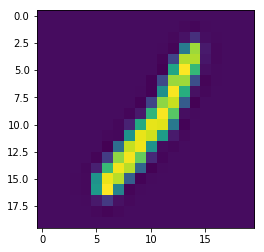

In [282]:
idx = np.random.randint(X.shape[0], size=1)
visualizeAndPredict(thetas, X[idx,:], y[idx])

#### Using Scikit-Learn Logistic regression to train our model

In [284]:
multi_lg = LogisticRegression()

In [305]:
multi_lg.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [306]:
multi_lg.score(X, y)

0.94379999999999997

In [ ]:
def visualizeAndPredict_SK(thetas, image, labels):
    plt.imshow(np.reshape(image, (IMAGE_SIZE, IMAGE_SIZE), order='F'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    print('Predict : '+ str(multi_lg.predict(image))+ ',Actual :' + str(labels), end='\r')

Display images that our model's prediction is wrong

In [340]:
def visualizeWrongPredict(thetas, image, labels):
    prd = multi_lg.predict(image)
    if (prd != labels):
        visualizeAndPredict_SK(thetas, image, labels)
        time.sleep(3)

In [351]:
for i in range(X.shape[0]):
    visualizeWrongPredict(thetas, X[[i],:], y[i])